<a href="https://colab.research.google.com/github/apriliamercyana/Prediksi_Harga_Penutupan_Crypto/blob/main/Prediksi%20Harga%20Penutupan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pkg_resources

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

/tmp/ipython-input-2065685441.py:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [2]:
df = pd.read_excel("CONTOH_DATA.xlsx")
df.head()

,date,ticker,open,high,low,close,volume
0,2017-10-02,ADA,0.024607,0.030088,0.019969,0.025932,57641300.0
1,2017-10-03,ADA,0.025757,0.027425,0.020690,0.020816,16997800.0
2,2017-10-04,ADA,0.020864,0.022806,0.020864,0.021931,9000050.0
3,2017-10-05,ADA,0.021951,0.022154,0.020859,0.021489,5562510.0
4,2017-10-06,ADA,0.021359,0.021542,0.018360,0.018539,7780710.0


In [3]:
print("\nJumlah Data per Ticker:")
print(df['ticker'].value_counts())


Jumlah Data per Ticker:
ticker
BTC    5599
ADA    2962
Name: count, dtype: int64


In [4]:
print("\nInfo data:")
df.info()


Info data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8561 entries, 0 to 8560
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    8561 non-null   datetime64[ns]
 1   ticker  8561 non-null   object        
 2   open    8561 non-null   float64       
 3   high    8561 non-null   float64       
 4   low     8561 non-null   float64       
 5   close   8561 non-null   float64       
 6   volume  8561 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 468.3+ KB


In [5]:
print("\nJumlah Nilai Hilang per Kolom:")
print(df.isnull().sum())


Jumlah Nilai Hilang per Kolom:
date      0
ticker    0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [6]:
print("\nJumlah Duplikasi:", df.duplicated().sum())


Jumlah Duplikasi: 0


In [7]:
df.columns = df.columns.str.lower().str.strip()
df = df.drop_duplicates()
df = df.fillna(df.mean(numeric_only=True))
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.sort_values(by=['ticker', 'date']).reset_index(drop=True)
df = df[df['volume'] >= 0]
df = df.dropna(subset=['date', 'open', 'high', 'low', 'close'])
df['daily_return'] = (df['close'] - df['open']) / df['open']
df['range'] = df['high'] - df['low']

In [8]:
df.to_excel("DATA_WRANGLED_OF_CONTOH_DATA.xlsx", index=False)
print("\nData wrangling selesai! File tersimpan sebagai 'DATA_WRANGLED_OF_CONTOH_DATA.xlsx'")


Data wrangling selesai! File tersimpan sebagai 'DATA_WRANGLED_OF_CONTOH_DATA.xlsx'


In [9]:
df = pd.read_excel("DATA_WRANGLED_OF_CONTOH_DATA.xlsx")
df.head()

,date,ticker,open,high,low,close,volume,daily_return,range
0,2017-10-02,ADA,0.024607,0.030088,0.019969,0.025932,57641300.0,0.053838,0.010118
1,2017-10-03,ADA,0.025757,0.027425,0.020690,0.020816,16997800.0,-0.191827,0.006735
2,2017-10-04,ADA,0.020864,0.022806,0.020864,0.021931,9000050.0,0.051160,0.001942
3,2017-10-05,ADA,0.021951,0.022154,0.020859,0.021489,5562510.0,-0.021074,0.001294
4,2017-10-06,ADA,0.021359,0.021542,0.018360,0.018539,7780710.0,-0.132020,0.003182


In [10]:
print("\nInfo data:")
df.info()


Info data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8561 entries, 0 to 8560
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          8561 non-null   datetime64[ns]
 1   ticker        8561 non-null   object        
 2   open          8561 non-null   float64       
 3   high          8561 non-null   float64       
 4   low           8561 non-null   float64       
 5   close         8561 non-null   float64       
 6   volume        8561 non-null   float64       
 7   daily_return  8561 non-null   float64       
 8   range         8561 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 602.1+ KB


In [11]:
print("\nSummary Statistics (Numeric):")
print(df.describe())


Summary Statistics (Numeric):
                                date           open           high  \
count                           8561    8561.000000    8561.000000   
mean   2019-06-12 04:25:55.893003264   12411.802706   12664.026323   
min              2010-07-14 00:00:00       0.018414       0.021050   
25%              2016-05-23 00:00:00       0.509751       0.524594   
50%              2020-01-01 00:00:00     236.003998     239.203995   
75%              2022-12-06 00:00:00    9664.904775    9834.716790   
max              2025-11-10 00:00:00  124752.139724  126198.069603   
std                              NaN   25020.574624   25471.761932   

                 low          close        volume  daily_return         range  
count    8561.000000    8561.000000  8.561000e+03   8561.000000   8561.000000  
mean    12146.412536   12423.669381  1.041617e+10      0.003394    517.613787  
min         0.017620       0.018539  0.000000e+00     -0.489330      0.000000  
25%         0.4884

In [12]:
df['month'] = df['date'].dt.to_period('Y')
avg_by_year = df.groupby(['ticker', 'month'])[['open', 'high', 'low', 'close']].mean()
print("Average Open, High, Low, Close by Month:")
print(avg_by_year)

Average Open, High, Low, Close by Month:
                       open           high            low          close
ticker month                                                            
ADA    2017        0.119886       0.138453       0.109645       0.127647
       2018        0.211599       0.222343       0.196307       0.209573
       2019        0.055521       0.057286       0.053596       0.055499
       2020        0.086391       0.089702       0.083192       0.086795
       2021        1.496549       1.564530       1.425722       1.499793
       2022        0.645236       0.665936       0.622073       0.642313
       2023        0.346159       0.355347       0.337965       0.347091
       2024        0.528740       0.546378       0.510592       0.529397
       2025        0.759778       0.785982       0.732508       0.758980
BTC    2010        0.141410       0.161868       0.125952       0.142819
       2011        5.837245       6.609892       5.195200       5.849199
       201

In [13]:
df['month'] = df['date'].dt.to_period('D')
avg_by_year = df.groupby(['month'])[['open', 'high', 'low', 'close']].mean()
print("Average Open, High, Low, Close by Month:")
print(avg_by_year)

Average Open, High, Low, Close by Month:
                    open          high           low         close
month                                                             
2010-07-14      0.058157      0.061588      0.048647      0.056402
2010-07-15      0.056403      0.067954      0.053969      0.057568
2010-07-16      0.058001      0.072220      0.057484      0.066492
2010-07-17      0.066500      0.077735      0.057418      0.065993
2010-07-18      0.066088      0.080858      0.064221      0.078814
...                  ...           ...           ...           ...
2025-11-06  51947.106206  52073.925045  50168.692727  50650.910729
2025-11-07  50643.387247  52026.751134  49628.789070  51686.491365
2025-11-08  51686.138657  51687.075410  50729.297526  51141.341237
2025-11-09  51139.774658  52709.476046  50734.712364  52360.108766
2025-11-10  52362.174691  53282.649271  52175.611199  52998.595031

[5599 rows x 4 columns]


In [14]:
avg_by_ticker = df.groupby('ticker')[['open', 'high', 'low', 'close']].mean()
print("\nAverage Open, High, Low, Close by Ticker:")
print(avg_by_ticker)


Average Open, High, Low, Close by Ticker:
                open          high           low         close
ticker                                                        
ADA         0.499735      0.519274      0.479179      0.499922
BTC     18977.667931  19363.313317  18571.891122  18995.812252


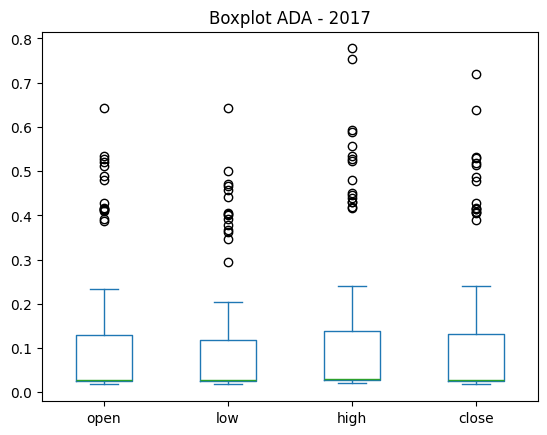

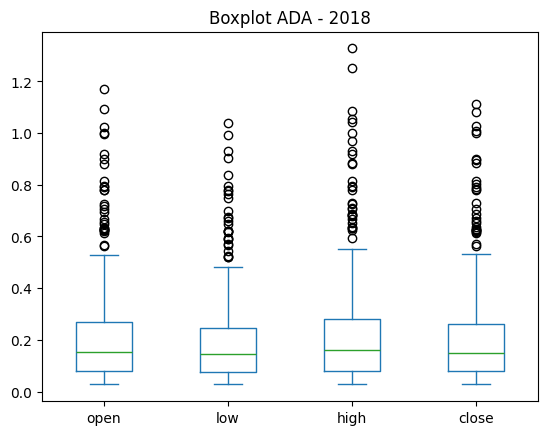

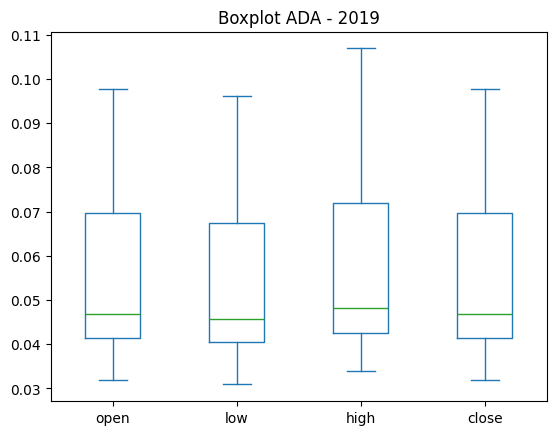

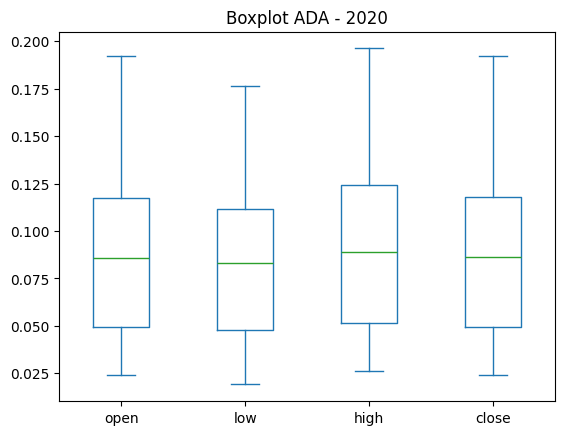

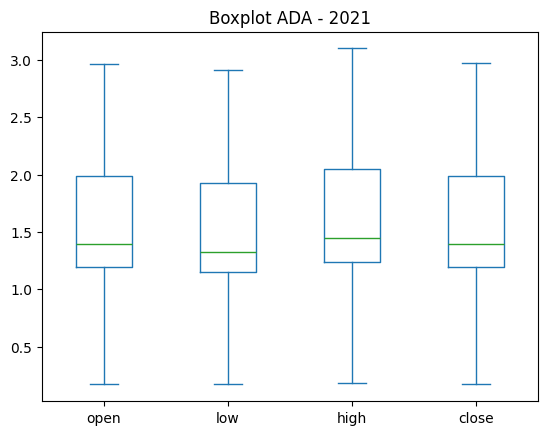

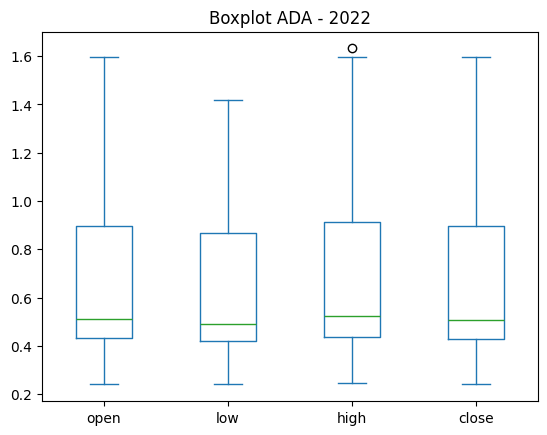

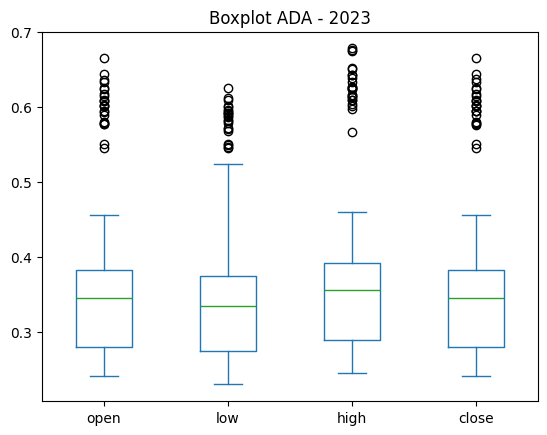

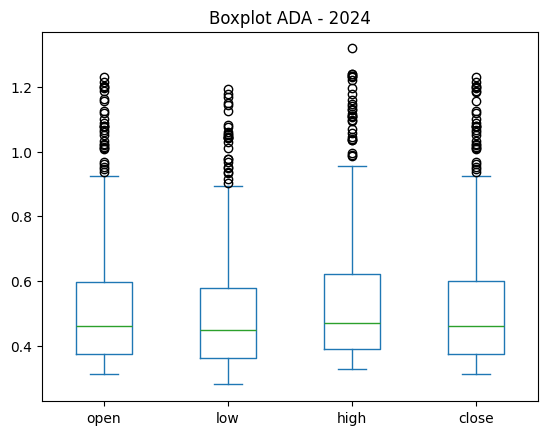

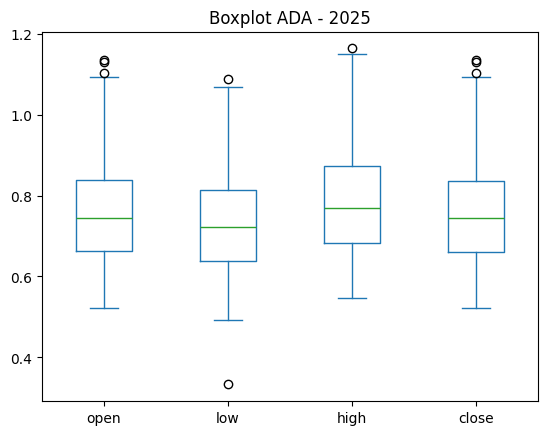

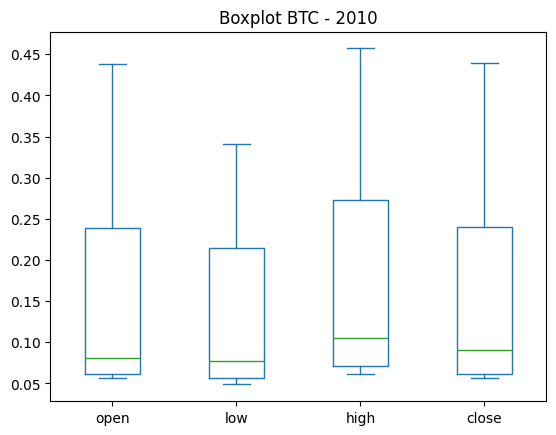

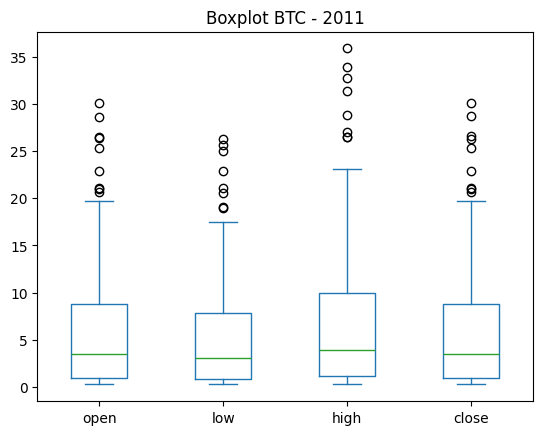

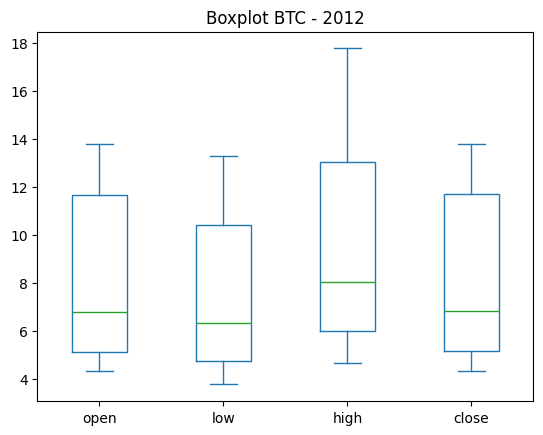

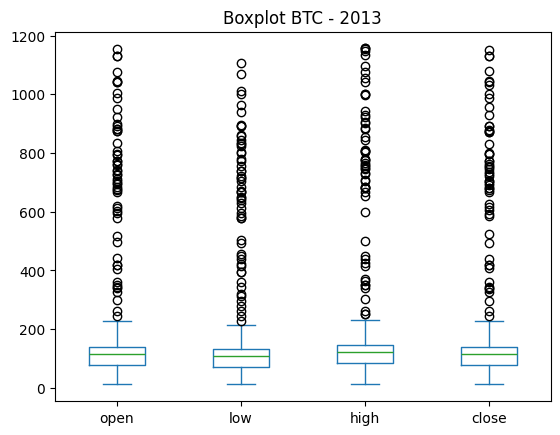

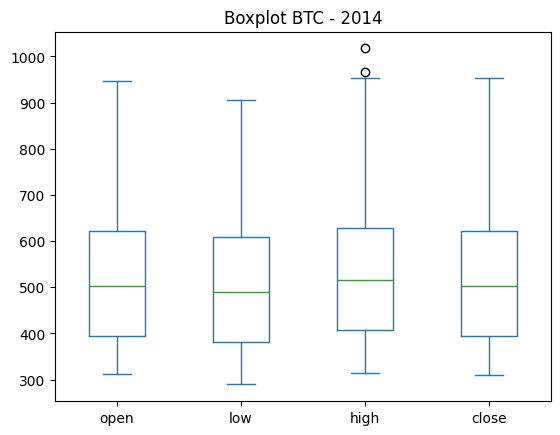

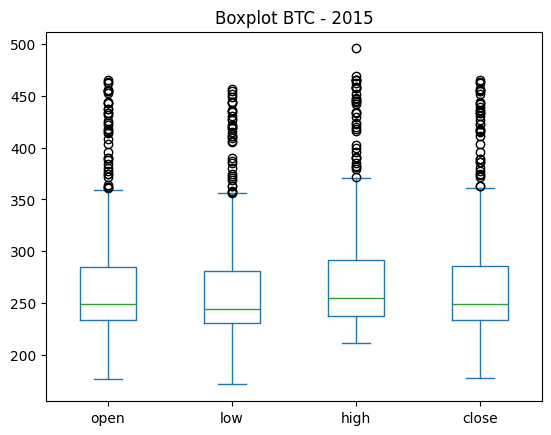

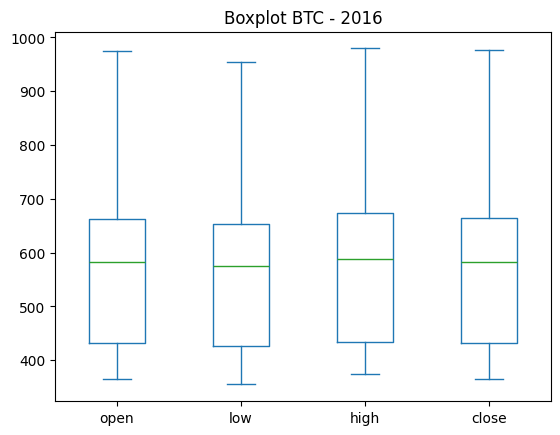

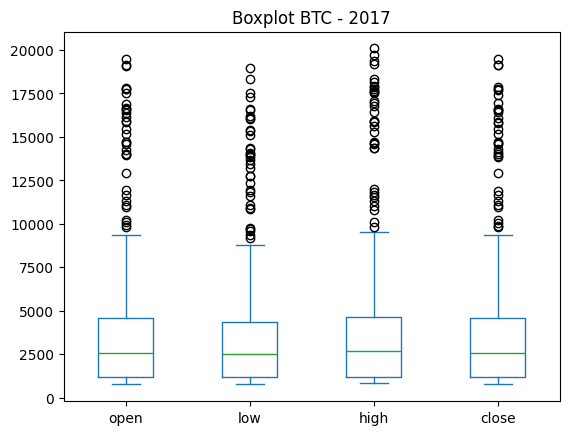

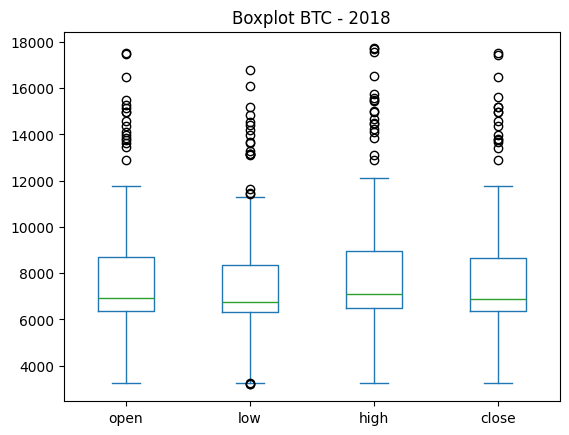

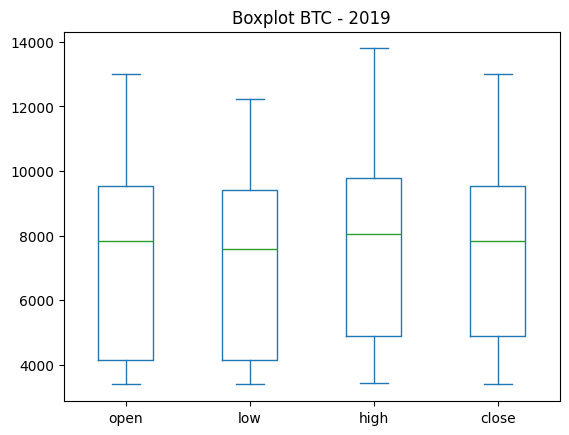

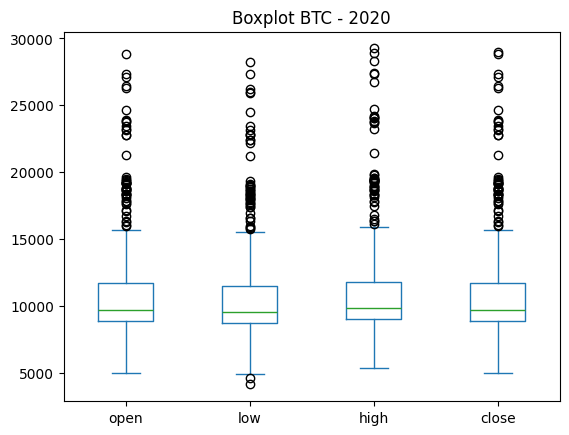

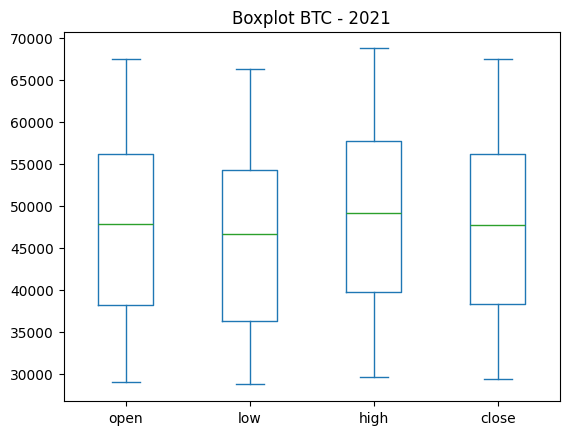

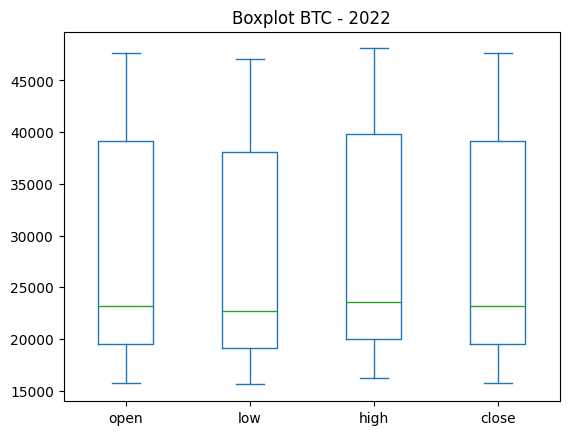

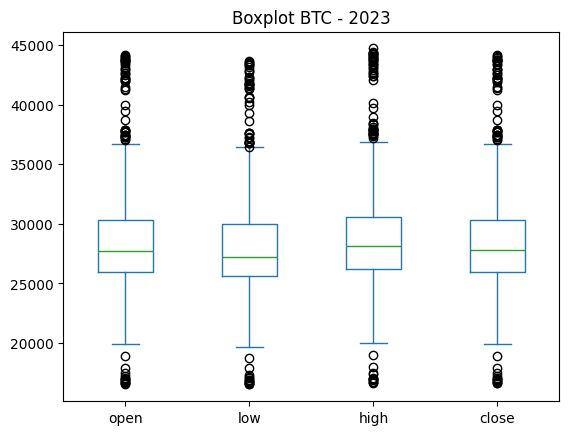

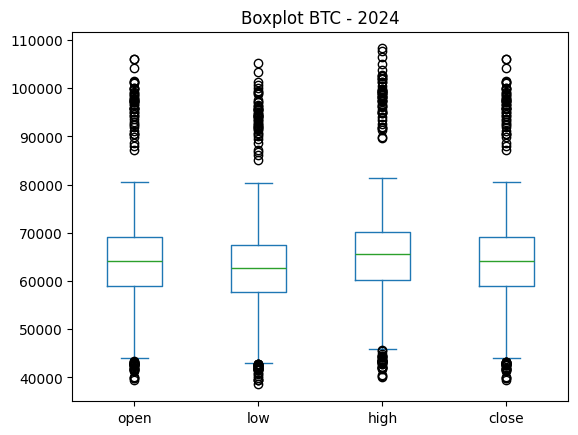

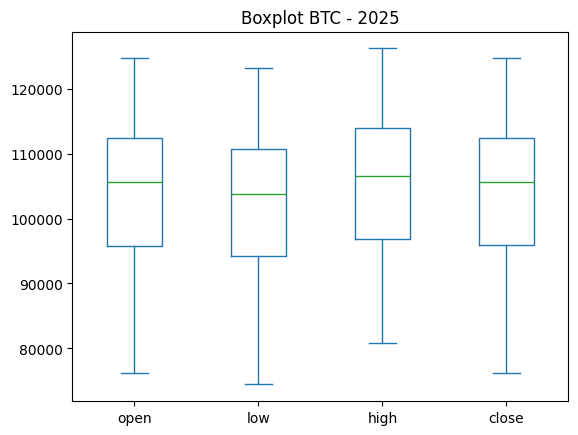

In [15]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df[df['ticker'].isin(['ADA', 'BTC'])]
cols = ['open', 'low', 'high', 'close']

for ticker in ['ADA', 'BTC']:
    for year in sorted(df['year'].unique()):
        subset = df[(df['ticker'] == ticker) & (df['year'] == year)]

        if subset.empty:
            continue

        subset[cols].plot(kind='box', title=f'Boxplot {ticker} - {year}')
        plt.show()

In [16]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df_clean = pd.DataFrame()

for ticker in df['ticker'].unique():

    df_ticker = df[df['ticker'] == ticker]

    for year in df_ticker['year'].unique():

        group = df_ticker[df_ticker['year'] == year]

        Q1 = group['close'].quantile(0.25)
        Q3 = group['close'].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        filtered_group = group[(group['close'] >= lower) & (group['close'] <= upper)]

        df_clean = pd.concat([df_clean, filtered_group], ignore_index=True)

print("Bentuk DataFrame asli:", df.shape)
print("Bentuk DataFrame setelah hapus outlier per ticker per tahun:", df_clean.shape)

Bentuk DataFrame asli: (8561, 11)
Bentuk DataFrame setelah hapus outlier per ticker per tahun: (8119, 11)


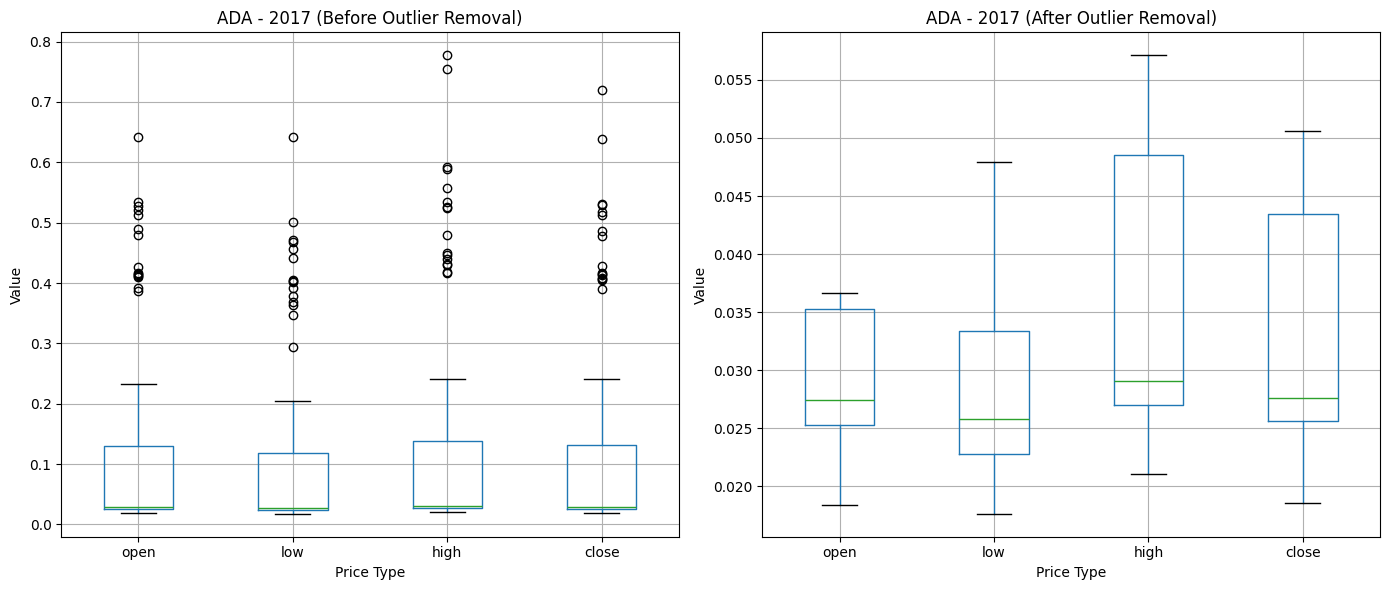

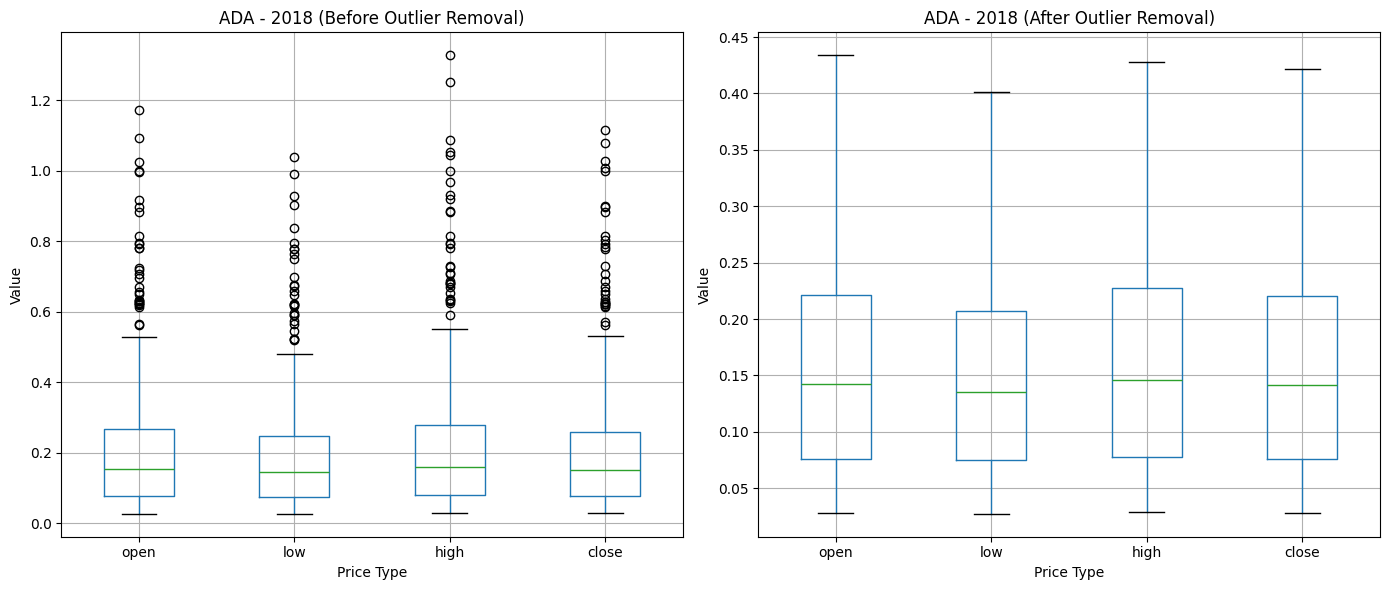

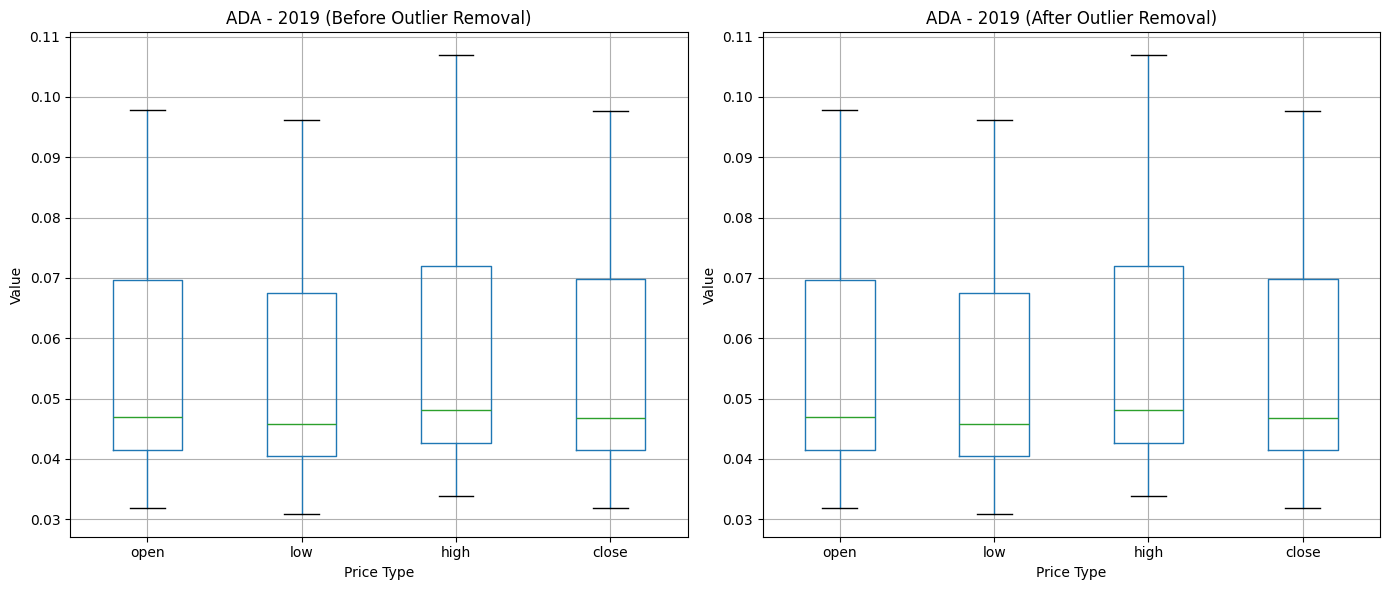

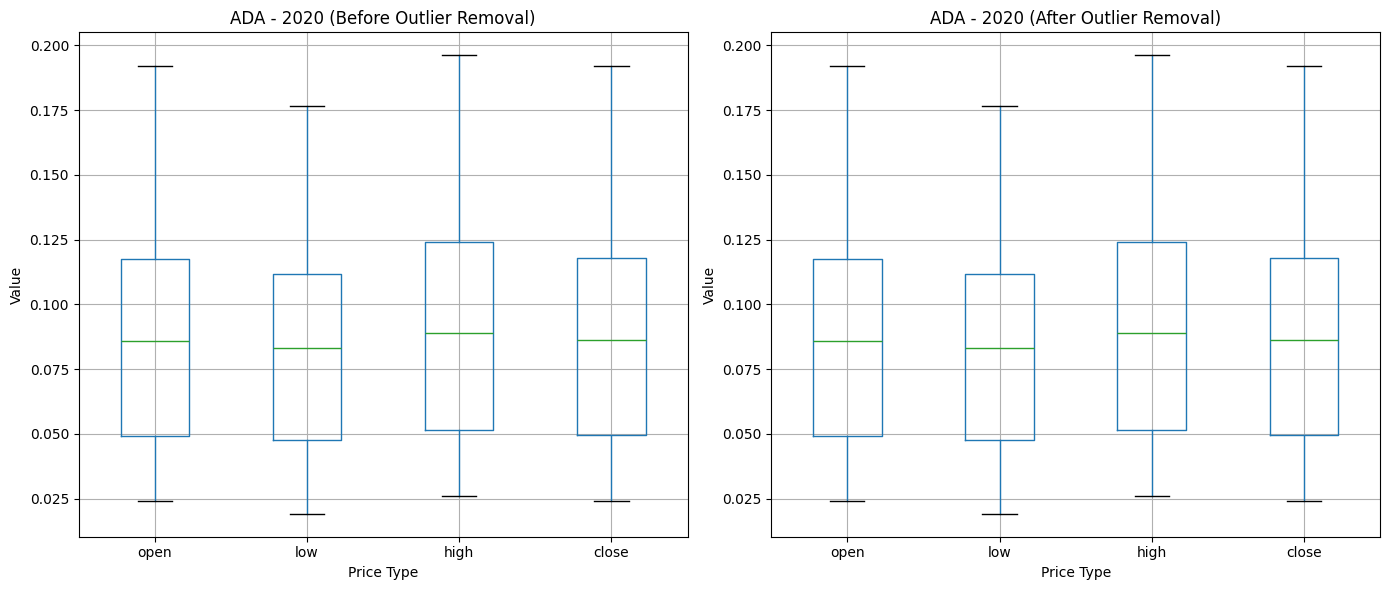

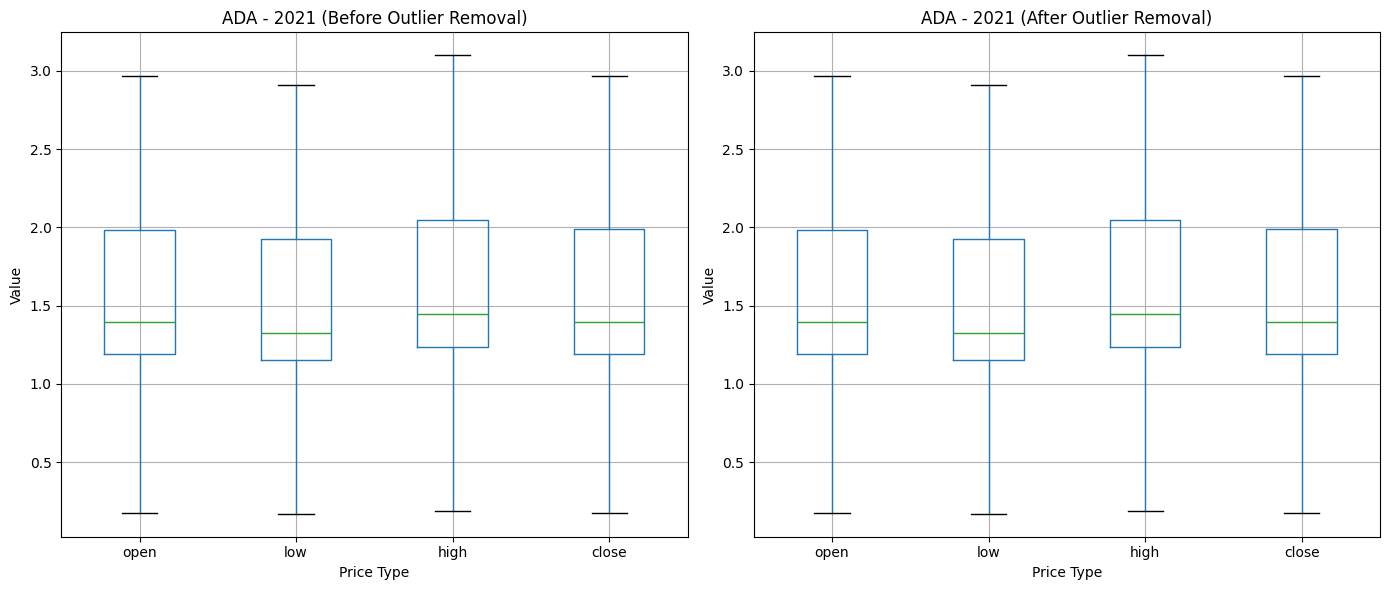

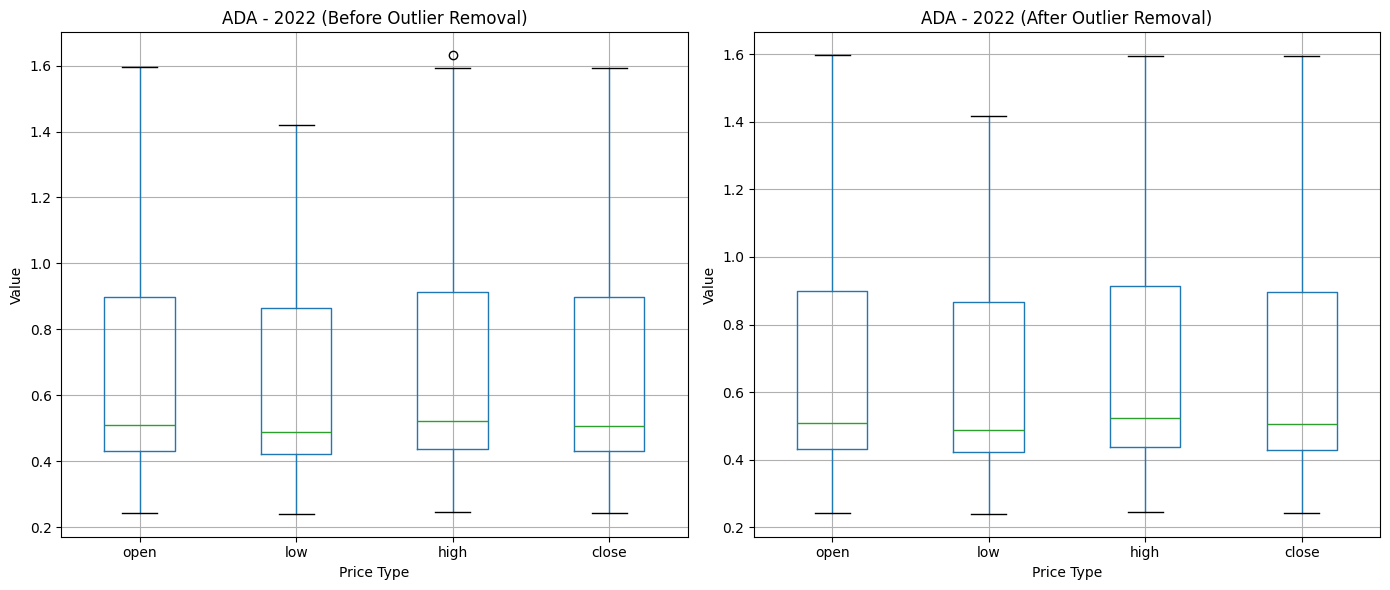

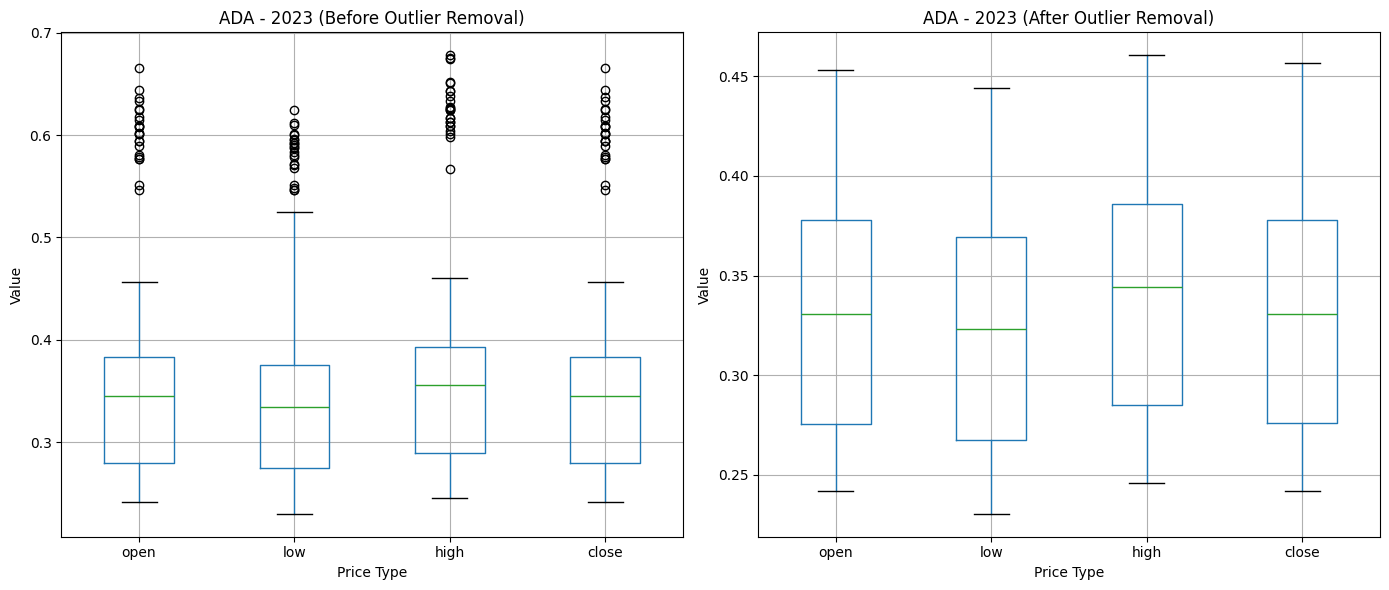

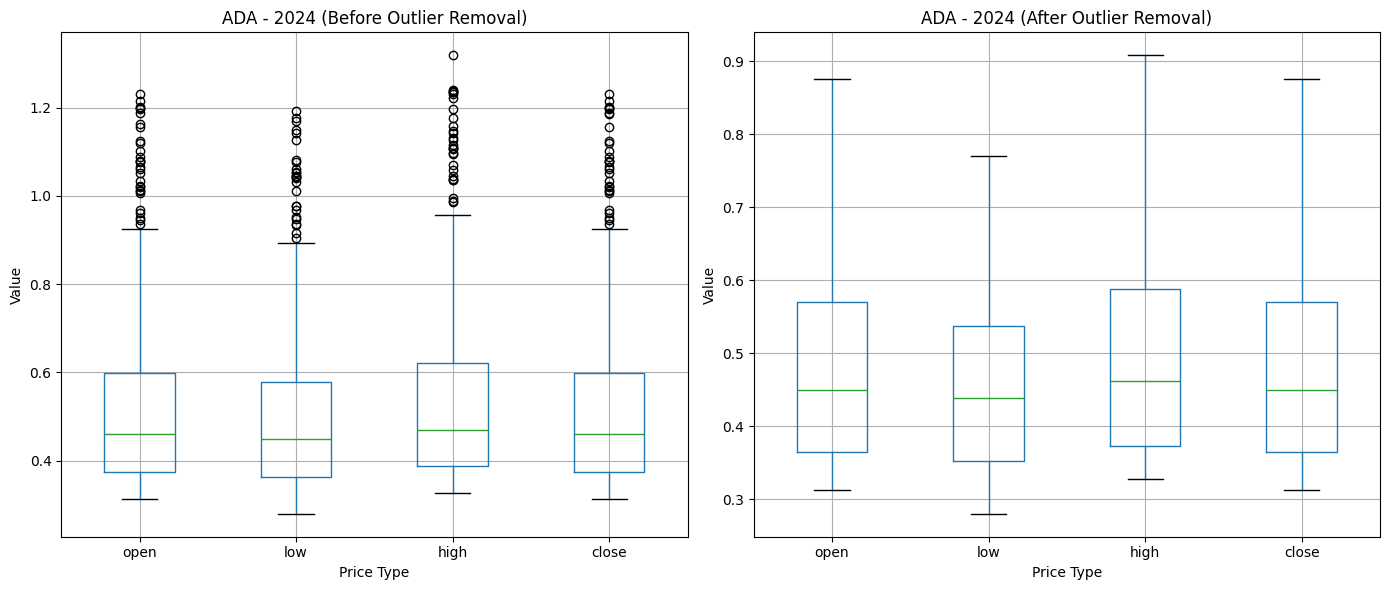

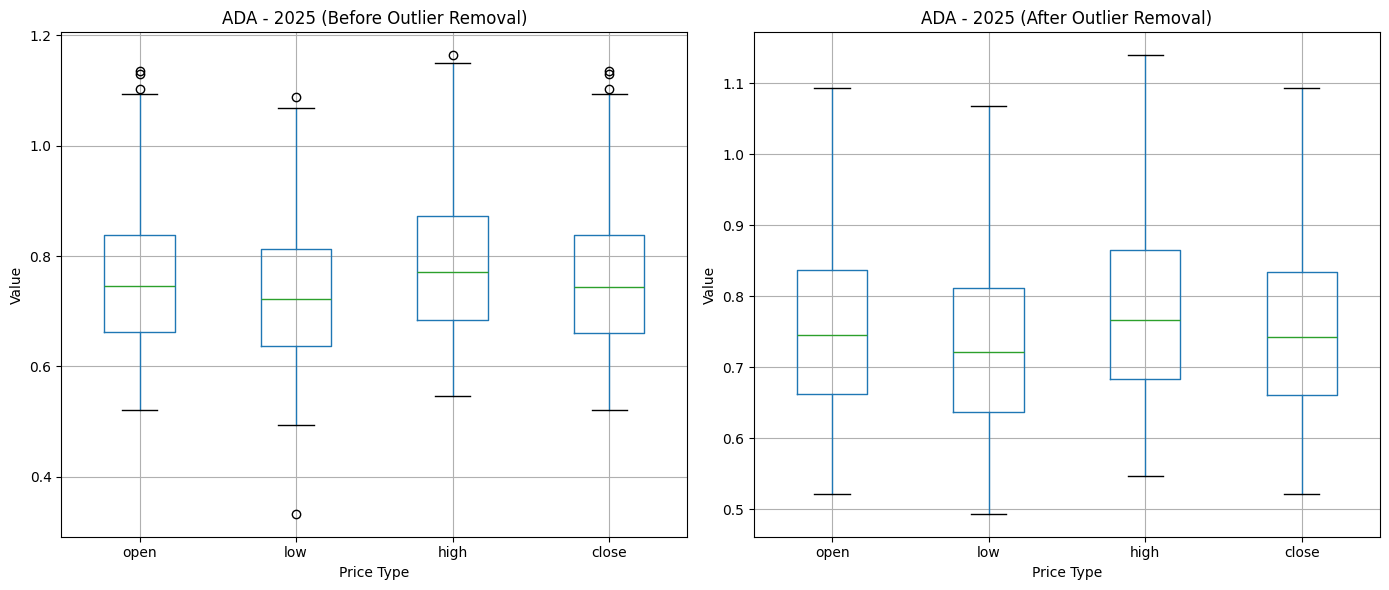

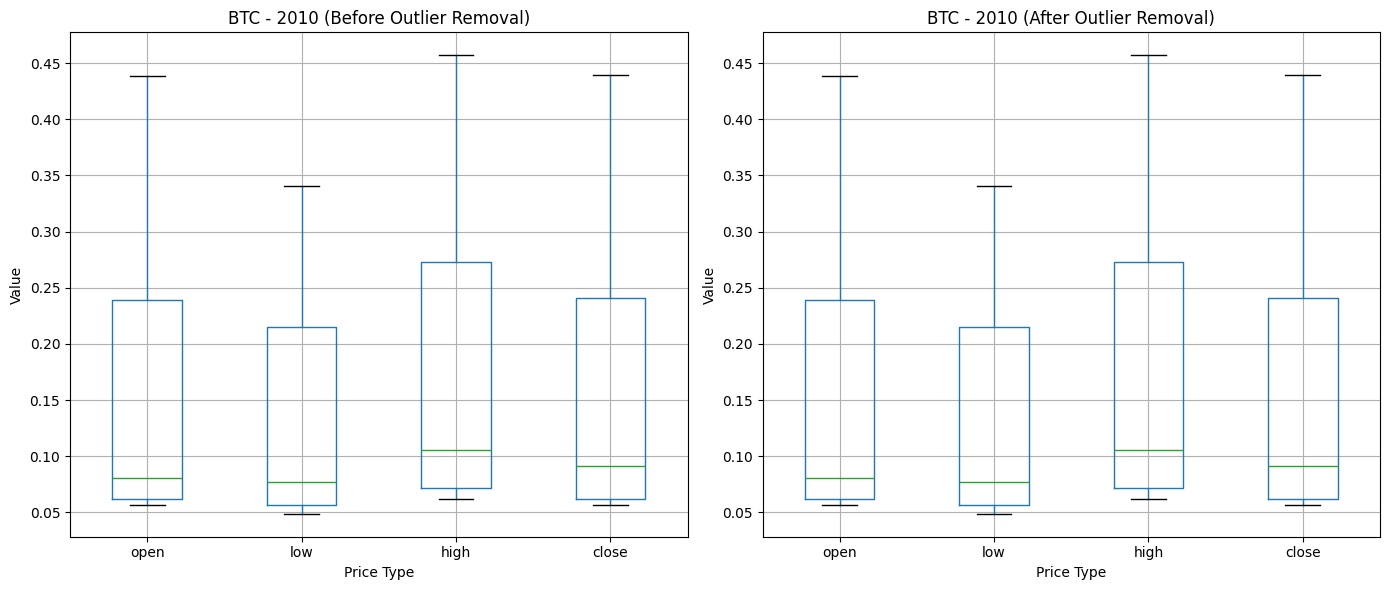

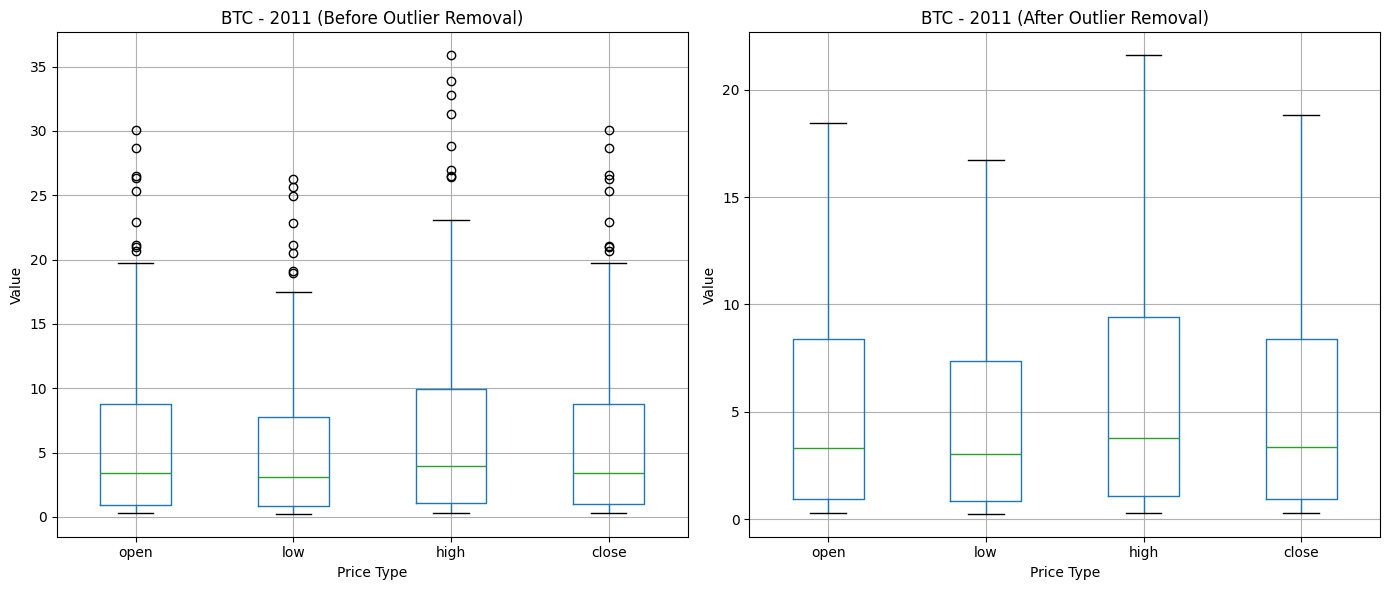

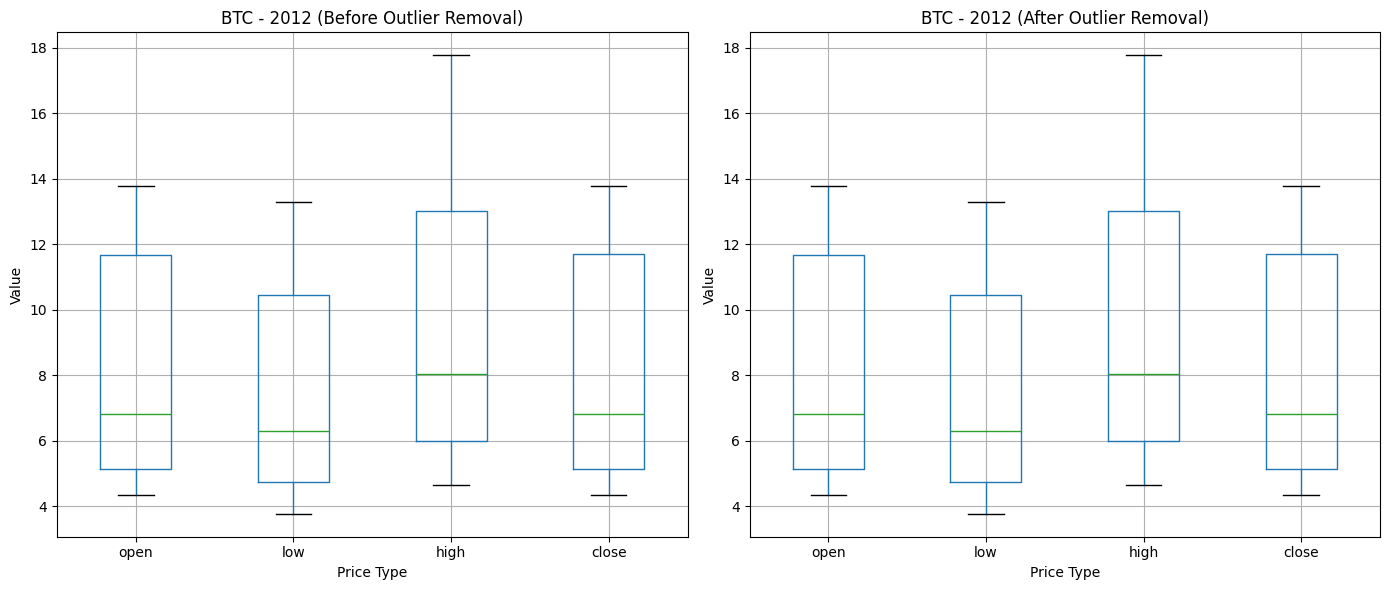

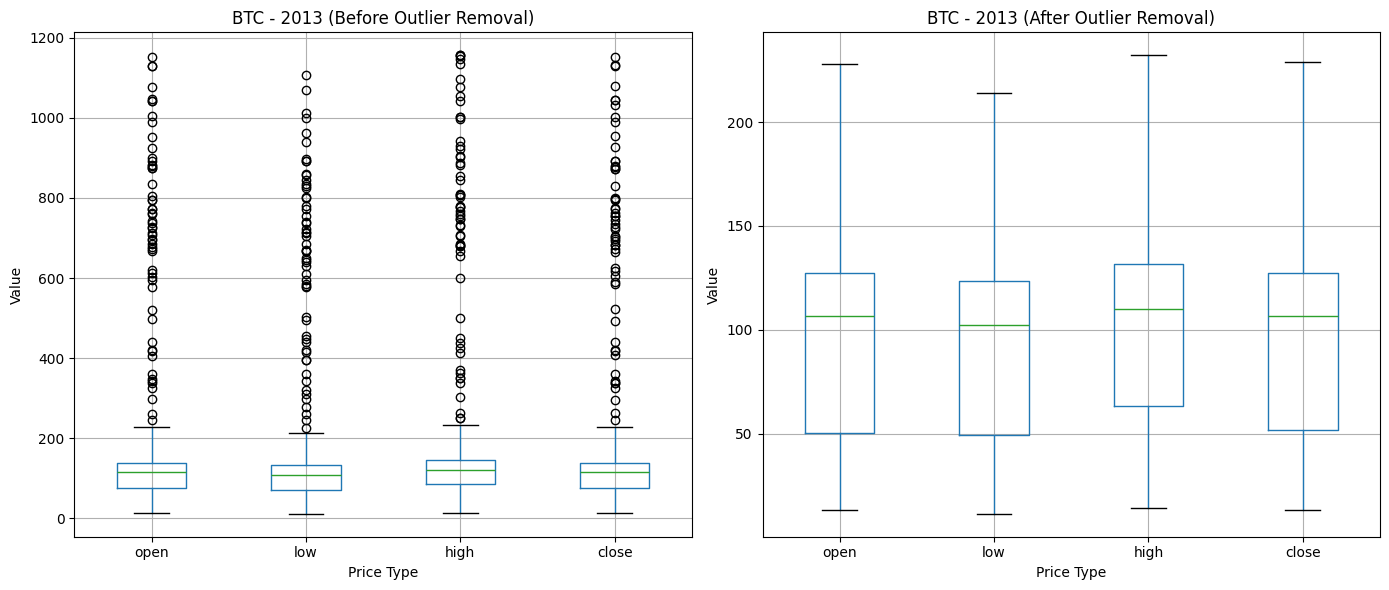

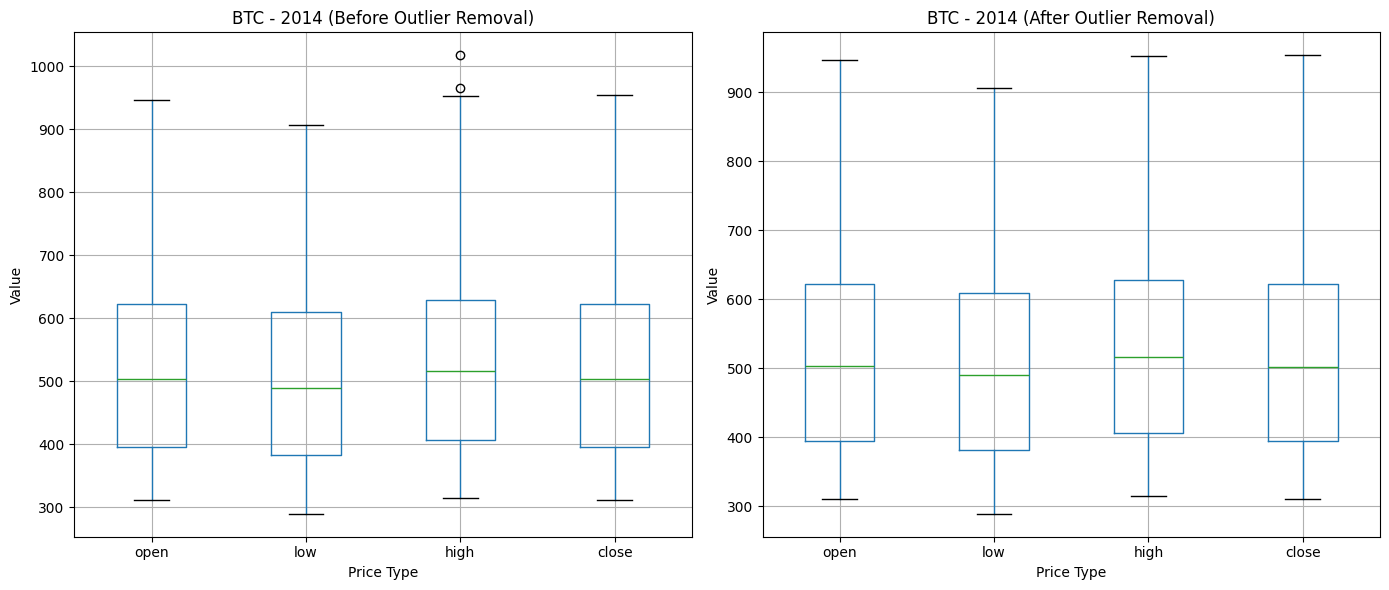

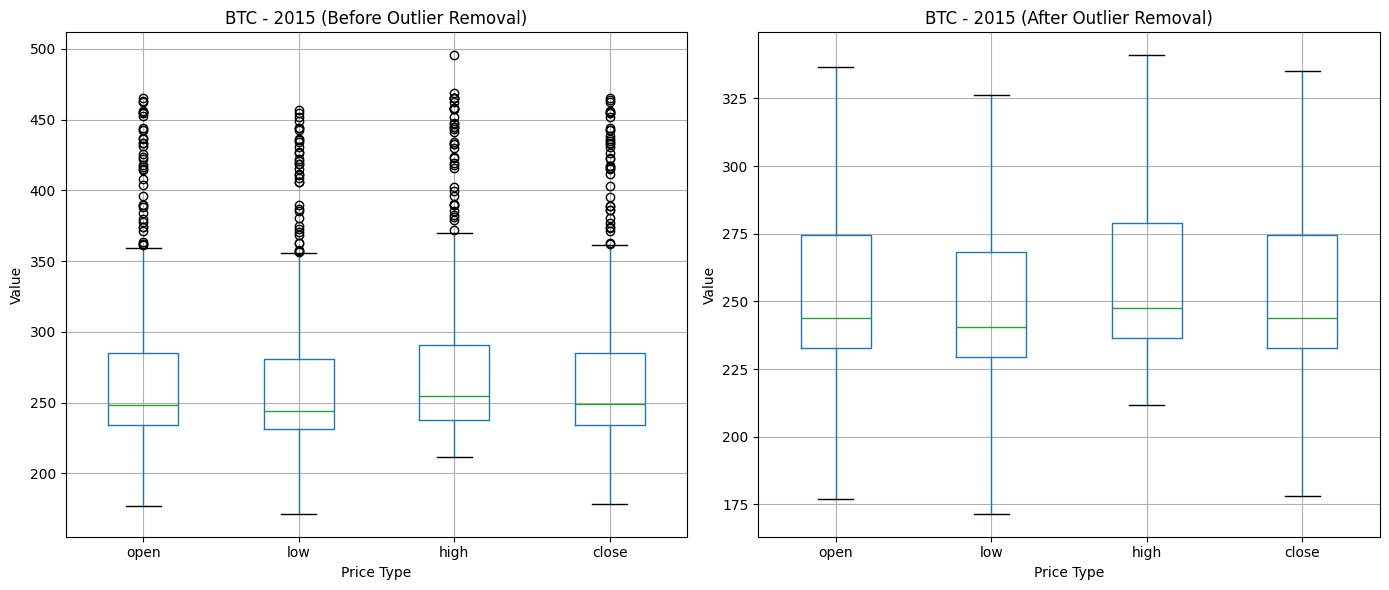

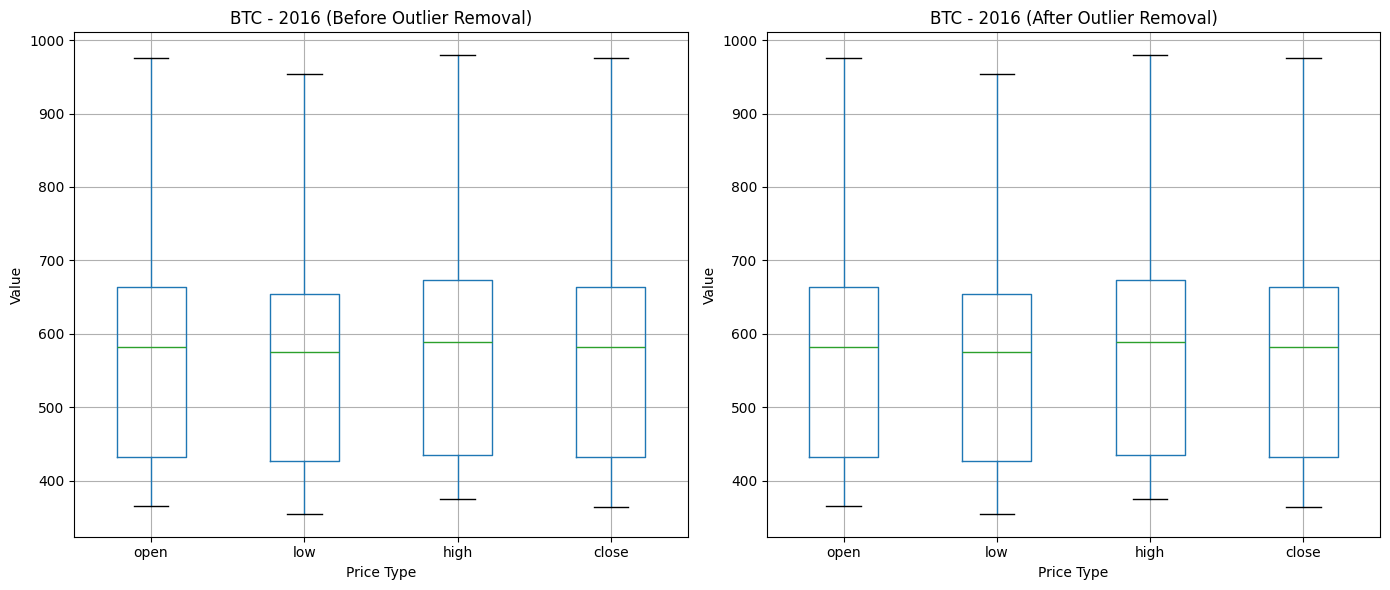

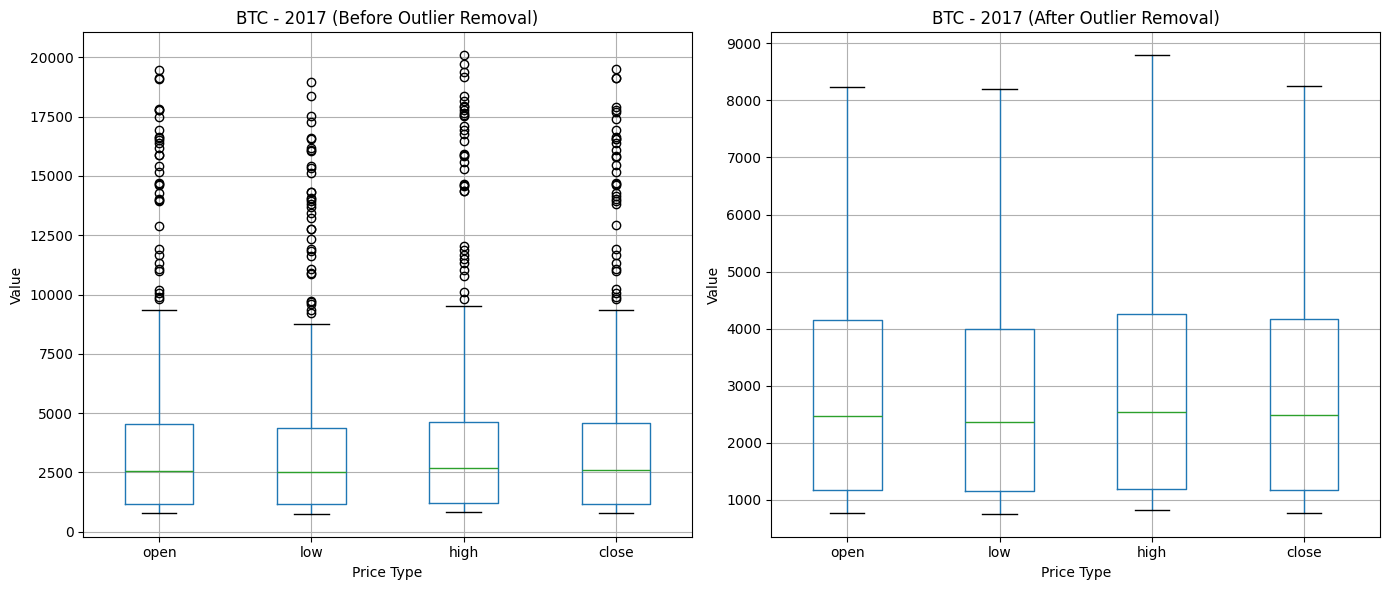

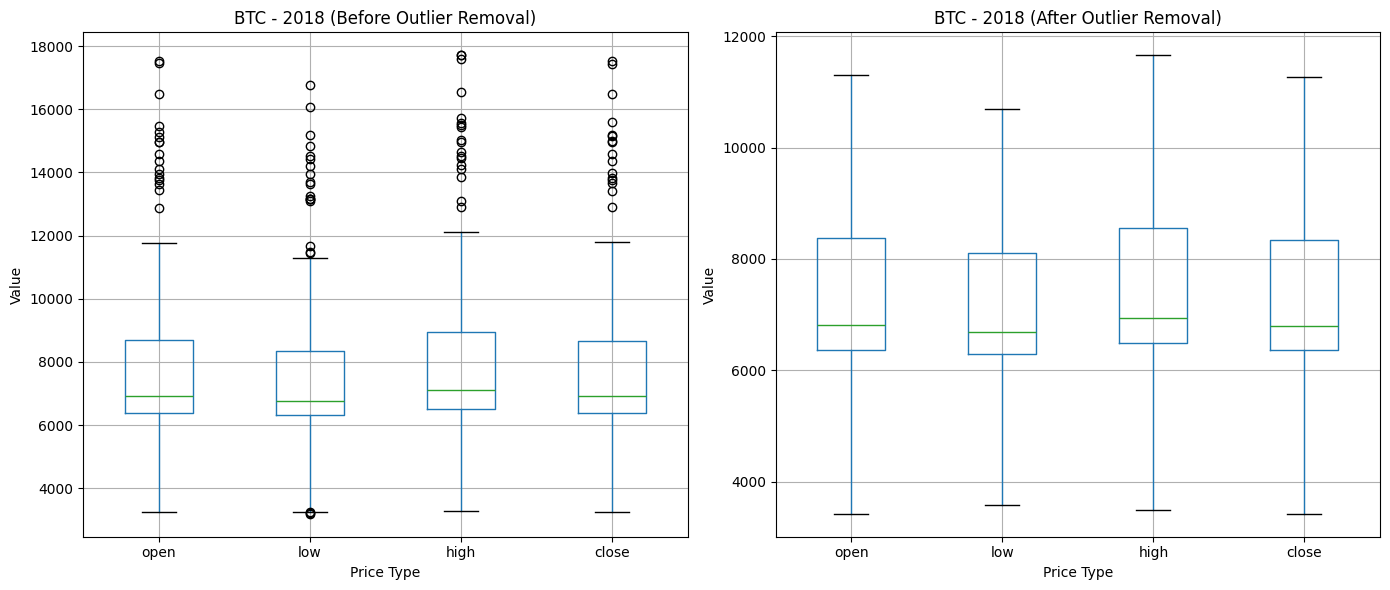

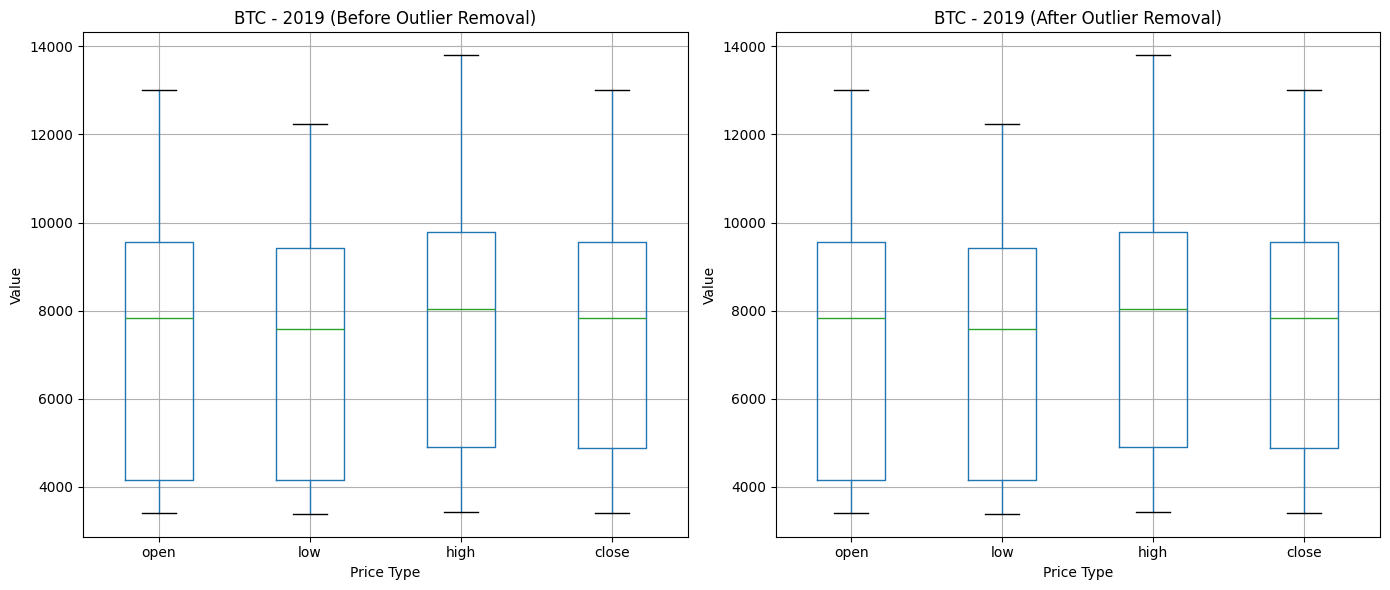

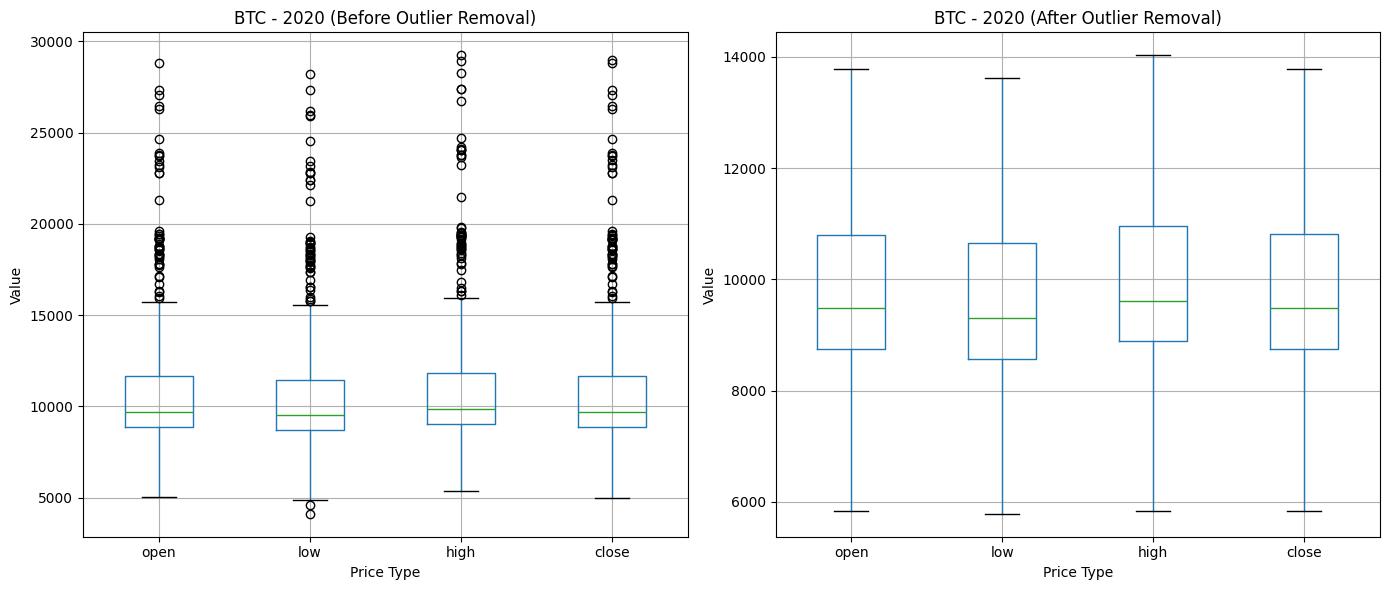

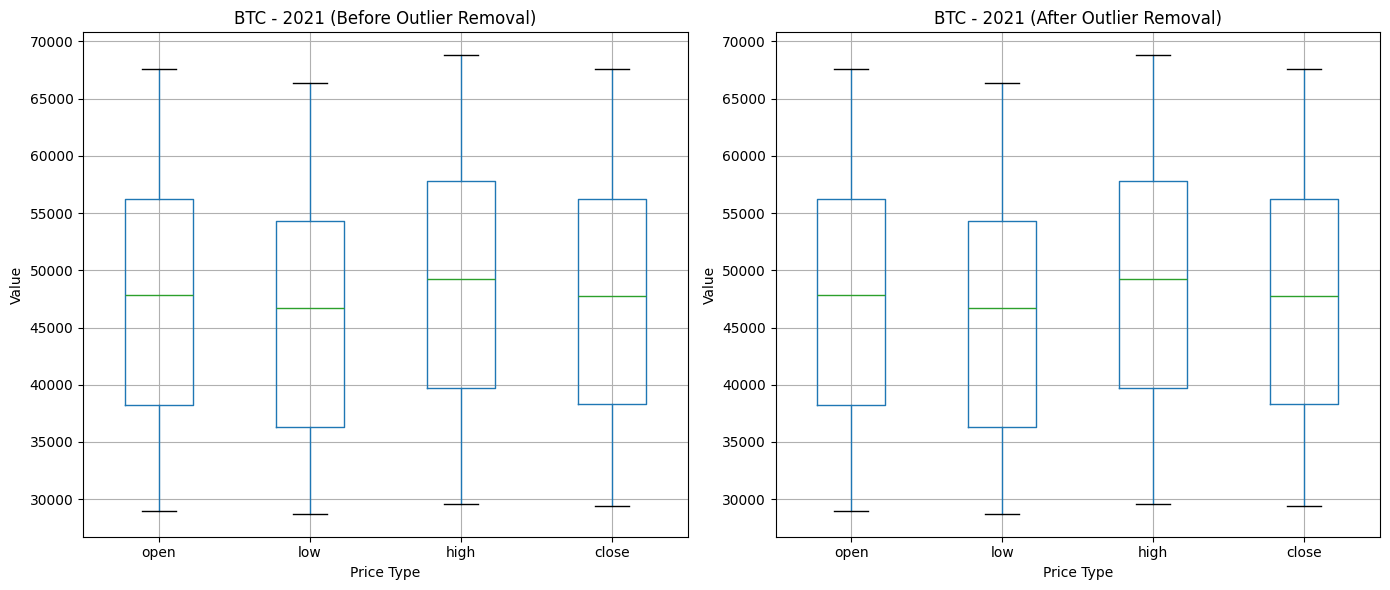

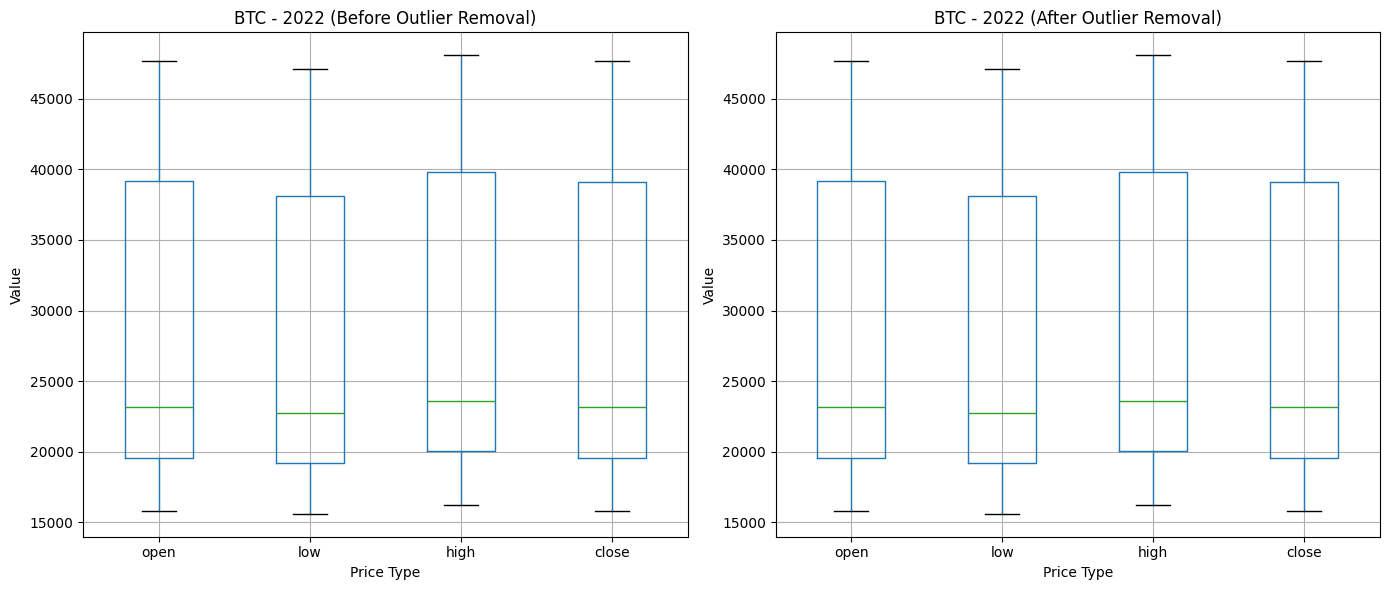

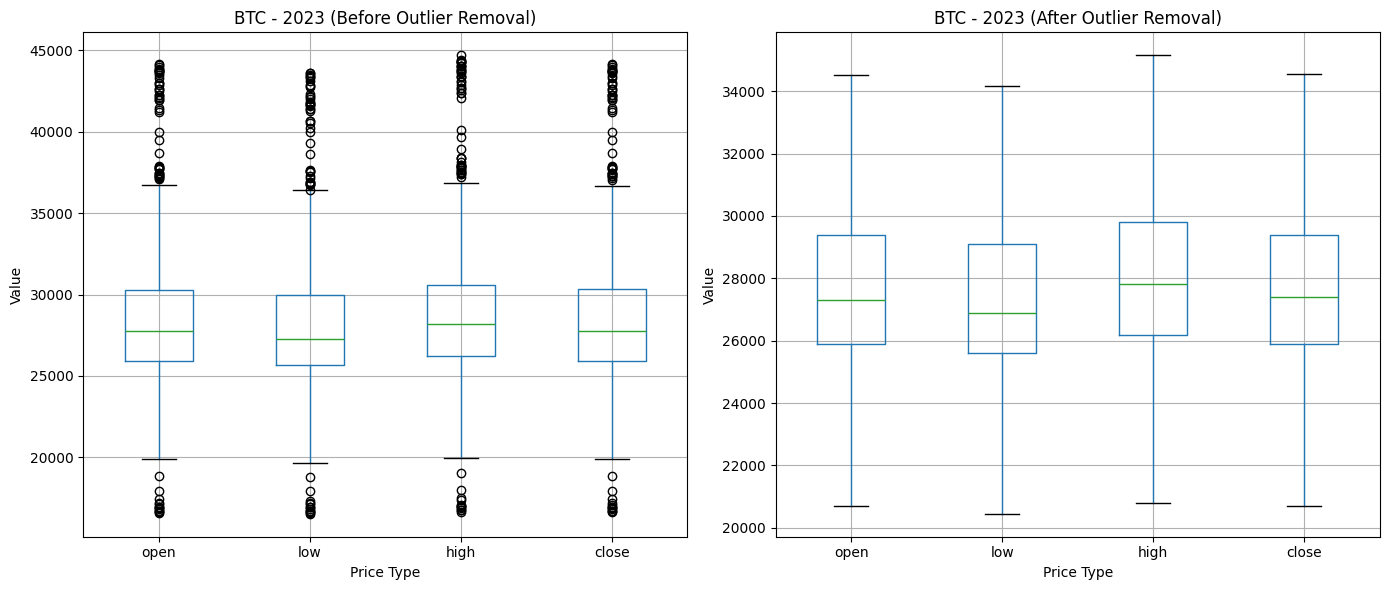

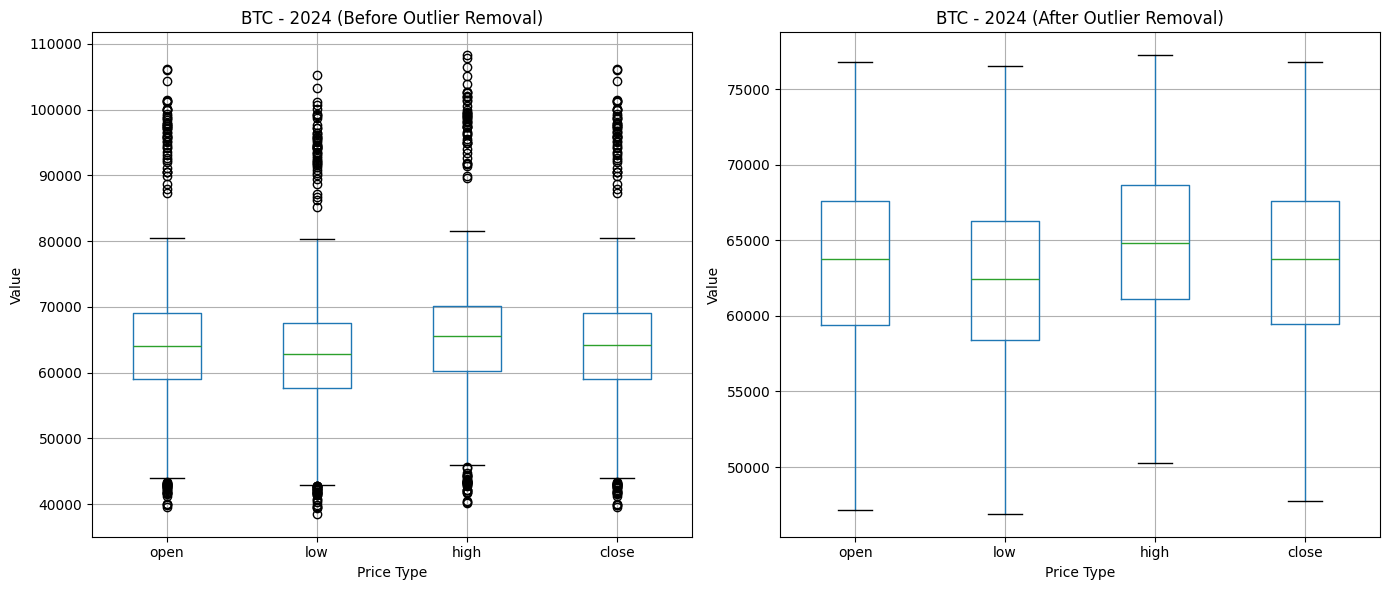

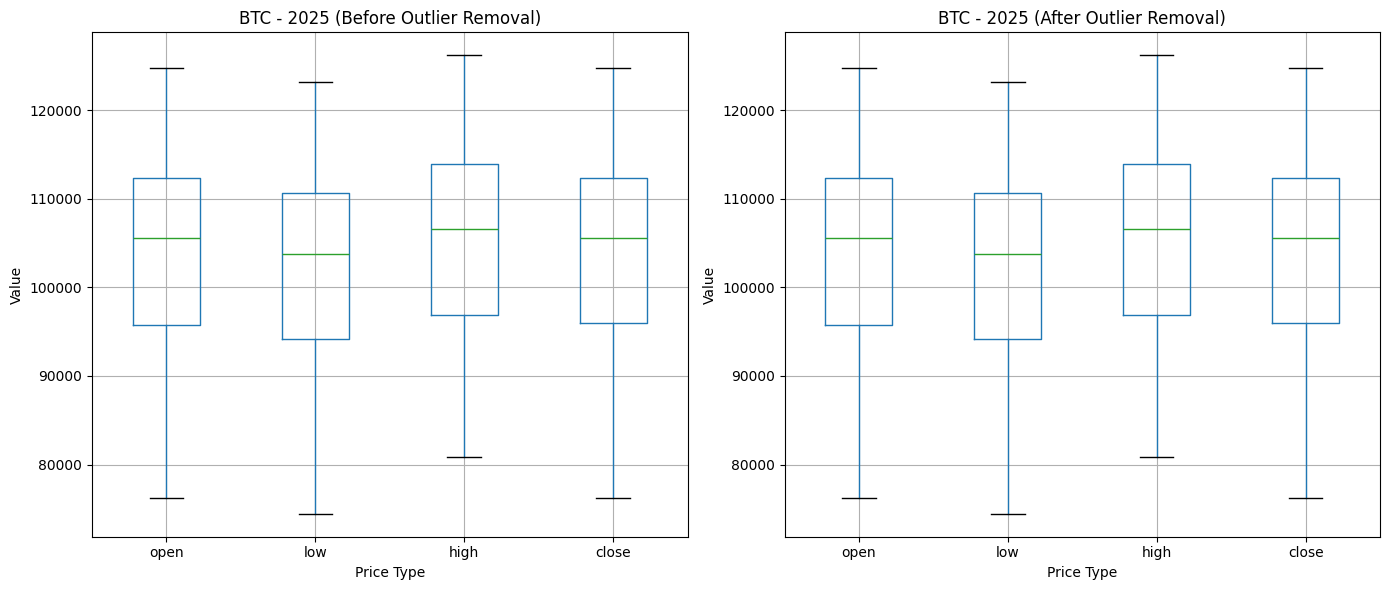

In [17]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df[df['ticker'].isin(['ADA', 'BTC'])]
cols = ['open', 'low', 'high', 'close']
df_clean = pd.DataFrame()

for ticker in ['ADA', 'BTC']:
    df_ticker = df[df['ticker'] == ticker]

    for year in df_ticker['year'].unique():
        subset = df_ticker[df_ticker['year'] == year]

        if subset.empty:
            continue

        Q1 = subset['close'].quantile(0.25)
        Q3 = subset['close'].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        filtered = subset[(subset['close'] >= lower) & (subset['close'] <= upper)]
        df_clean = pd.concat([df_clean, filtered], ignore_index=True)

for ticker in ['ADA', 'BTC']:
    for year in sorted(df['year'].unique()):

        before = df[(df['ticker'] == ticker) & (df['year'] == year)]
        after = df_clean[(df_clean['ticker'] == ticker) & (df_clean['year'] == year)]

        if before.empty:
            continue

        plt.figure(figsize=(14, 6))

        # Plot BEFORE
        plt.subplot(1, 2, 1)
        before.boxplot(column=cols, ax=plt.gca())
        plt.title(f"{ticker} - {year} (Before Outlier Removal)")
        plt.xlabel("Price Type")
        plt.ylabel("Value")

        # Plot AFTER
        plt.subplot(1, 2, 2)
        after.boxplot(column=cols, ax=plt.gca(), showfliers=False)
        plt.title(f"{ticker} - {year} (After Outlier Removal)")
        plt.xlabel("Price Type")
        plt.ylabel("Value")

        plt.tight_layout()
        plt.show()

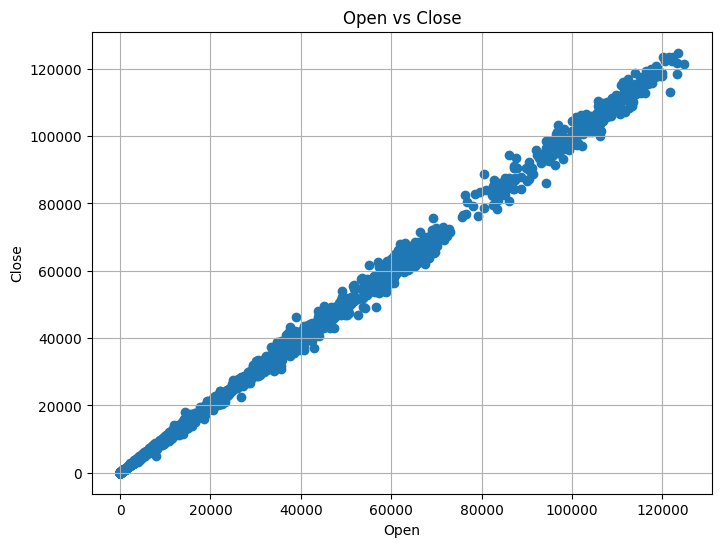

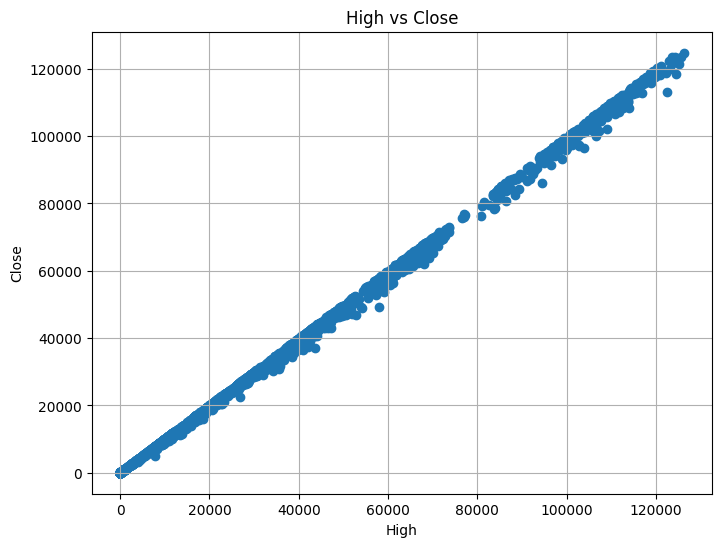

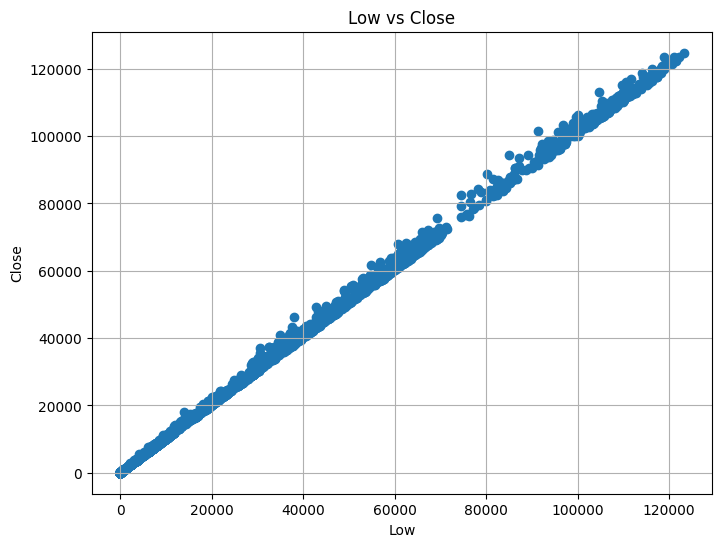

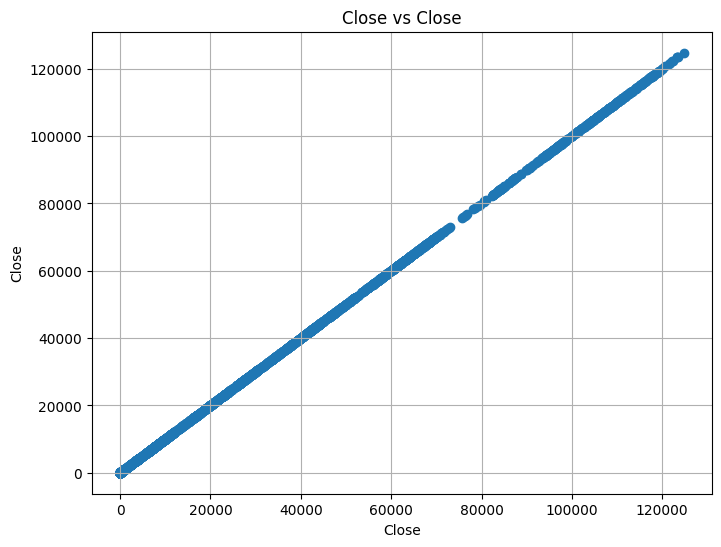

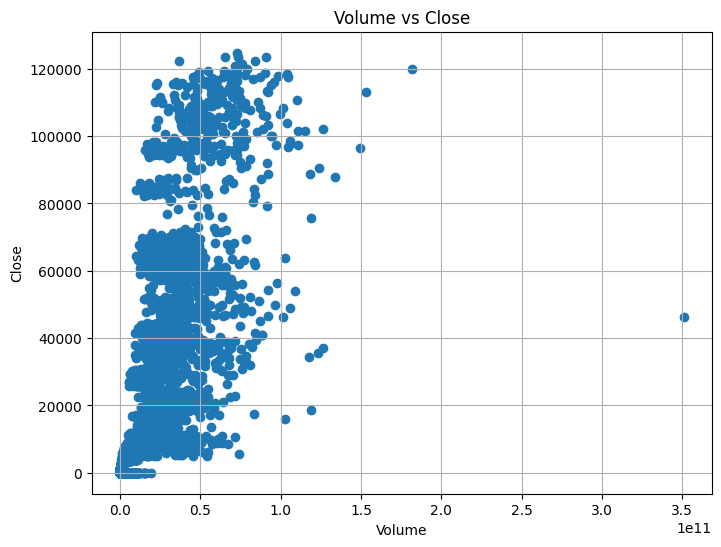

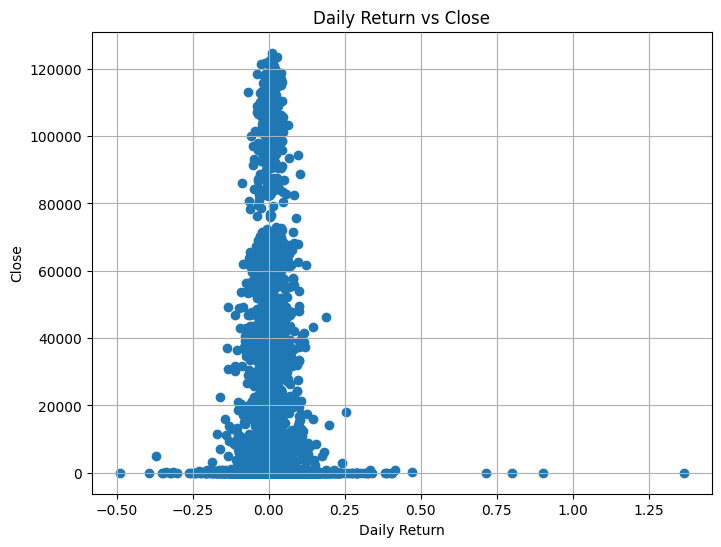

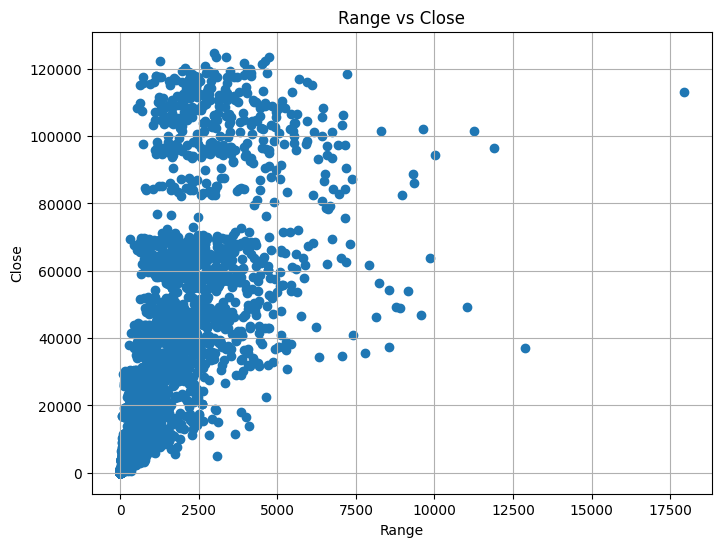

In [18]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df[df['ticker'].isin(['ADA', 'BTC'])]
numerical_cols = ['open', 'high', 'low', 'close', 'volume', 'daily_return', 'range']
target_col = 'close'

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[col], df[target_col])
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel(target_col.replace('_', ' ').title())
    plt.title(f'{col.replace("_", " ").title()} vs {target_col.replace("_", " ").title()}')
    plt.grid(True)
    plt.show()


Correlation Matrix:
            open      high       low     close    volume     range
open    1.000000  0.999784  0.999678  0.999551  0.784713  0.791836
high    0.999784  1.000000  0.999585  0.999800  0.788664  0.798452
low     0.999678  0.999585  1.000000  0.999753  0.778553  0.780786
close   0.999551  0.999800  0.999753  1.000000  0.784226  0.790609
volume  0.784713  0.788664  0.778553  0.784226  1.000000  0.834288
range   0.791836  0.798452  0.780786  0.790609  0.834288  1.000000


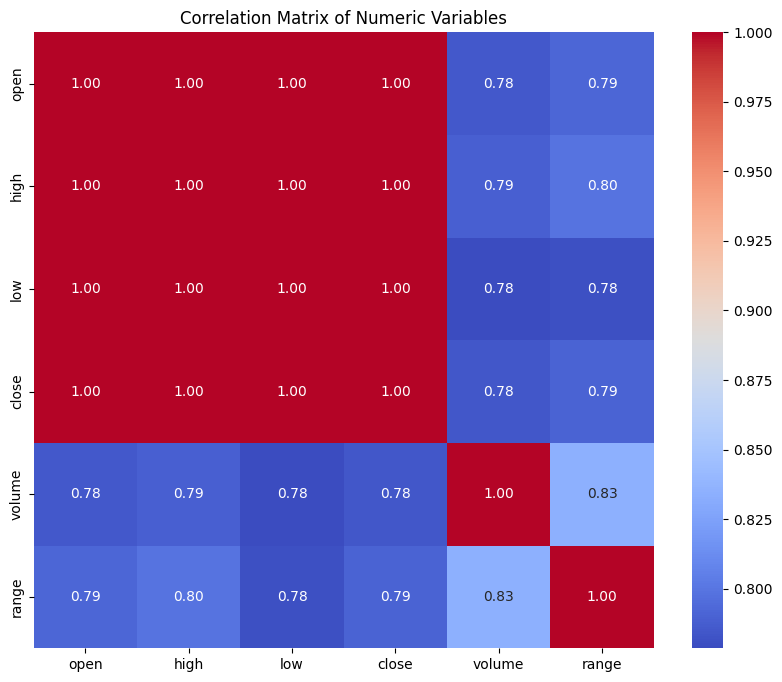

In [19]:
numerical_cols = ['open', 'high', 'low', 'close', 'volume', 'range']
correlation_matrix = df[numerical_cols].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [20]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

X = df.drop(['close'], axis=1)
y = df['close']

X = X.drop(['date', 'month'], axis=1)

X = pd.get_dummies(X, columns=['ticker', 'year'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nFirst 5 rows of X_train (after encoding):\n", X_train.head())

Shape of X_train: (6848, 22)
Shape of X_test: (1713, 22)
Shape of y_train: (6848,)
Shape of y_test: (1713,)

First 5 rows of X_train (after encoding):
                open           high            low        volume  daily_return  \
7973   69705.024322   69708.381258   64586.594304  5.070524e+10     -0.061087   
6240   11203.102488   11395.661360   10874.964923  2.383848e+10     -0.020052   
8462  114223.923285  115729.471975  114130.403165  3.578303e+10      0.007424   
5720   10108.200195   10381.599609    9777.419922  8.041160e+09      0.011169   
847        0.044627       0.048798       0.044230  9.700675e+07      0.073602   

            range  ticker_BTC  year_2011  year_2012  year_2013  ...  \
7973  5121.786954        True      False      False      False  ...   
6240   520.696436        True      False      False      False  ...   
8462  1599.068810        True      False      False      False  ...   
5720   604.179688        True      False      False      False  ...   
847   

In [21]:
# Inisialisasi model LinearRegression
linear_model = LinearRegression()

# Latih model menggunakan X_train dan y_train
linear_model.fit(X_train, y_train)

# Lakukan prediksi pada X_test
y_pred_lr = linear_model.predict(X_test)

# Hitung dan cetak metrik evaluasi
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("Linear Regression Model Performance:")
print(f"R-squared: {r2_lr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")

Linear Regression Model Performance:
R-squared: 0.9998
Mean Absolute Error (MAE): 119.27
Mean Squared Error (MSE): 120012.35


In [22]:
# Inisialisasi model DecisionTreeRegressor
dtr_model = DecisionTreeRegressor(random_state=42)

# Latih model menggunakan X_train dan y_train
dtr_model.fit(X_train, y_train)

# Lakukan prediksi pada X_test
y_pred_dtr = dtr_model.predict(X_test)

# Hitung dan cetak metrik evaluasi
r2_dtr = r2_score(y_test, y_pred_dtr)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)

print("Decision Tree Regressor Model Performance:")
print(f"R-squared: {r2_dtr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_dtr:.2f}")
print(f"Mean Squared Error (MSE): {mse_dtr:.2f}")

Decision Tree Regressor Model Performance:
R-squared: 0.9997
Mean Absolute Error (MAE): 124.53
Mean Squared Error (MSE): 174905.69


In [23]:
# Inisialisasi model RandomForestRegressor
rfr_model = RandomForestRegressor(random_state=42)

# Latih model menggunakan X_train dan y_train
rfr_model.fit(X_train, y_train)

# Lakukan prediksi pada X_test
y_pred_rfr = rfr_model.predict(X_test)

# Hitung dan cetak metrik evaluasi
r2_rfr = r2_score(y_test, y_pred_rfr)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)

print("Random Forest Regressor Model Performance:")
print(f"R-squared: {r2_rfr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rfr:.2f}")
print(f"Mean Squared Error (MSE): {mse_rfr:.2f}")

Random Forest Regressor Model Performance:
R-squared: 0.9998
Mean Absolute Error (MAE): 93.95
Mean Squared Error (MSE): 97601.87


In [24]:
# Inisialisasi model GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(random_state=42)

# Latih model menggunakan X_train dan y_train
gbr_model.fit(X_train, y_train)

# Lakukan prediksi pada X_test
y_pred_gbr = gbr_model.predict(X_test)

# Hitung dan cetak metrik evaluasi
r2_gbr = r2_score(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)

print("Gradient Boosting Regressor Model Performance:")
print(f"R-squared: {r2_gbr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_gbr:.2f}")
print(f"Mean Squared Error (MSE): {mse_gbr:.2f}")

Gradient Boosting Regressor Model Performance:
R-squared: 0.9998
Mean Absolute Error (MAE): 124.21
Mean Squared Error (MSE): 110770.83


In [25]:
# Inisialisasi model KNeighborsRegressor
knn_model = KNeighborsRegressor()

# Latih model menggunakan X_train dan y_train
knn_model.fit(X_train, y_train)

# Lakukan prediksi pada X_test
y_pred_knn = knn_model.predict(X_test)

# Hitung dan cetak metrik evaluasi
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print("K-Nearest Neighbors Regressor Model Performance:")
print(f"R-squared: {r2_knn:.4f}")
print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"Mean Squared Error (MSE): {mse_knn:.2f}")

K-Nearest Neighbors Regressor Model Performance:
R-squared: 0.6032
Mean Absolute Error (MAE): 7253.55
Mean Squared Error (MSE): 248176112.37


In [26]:
# Create a dictionary to store model performance
model_performance = {
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'K-Nearest Neighbors Regressor'],
    'R-squared': [r2_lr, r2_dtr, r2_rfr, r2_gbr, r2_knn],
    'MAE': [mae_lr, mae_dtr, mae_rfr, mae_gbr, mae_knn],
    'MSE': [mse_lr, mse_dtr, mse_rfr, mse_gbr, mse_knn]
}

# Convert to DataFrame
performance_df = pd.DataFrame(model_performance)

# Sort by R-squared in descending order to easily identify the best model
performance_df = performance_df.sort_values(by='R-squared', ascending=False)

print("\nModel Performance Comparison:")
print(performance_df.to_string(index=False))

print(f"\nThe best performing model based on R-squared is: {performance_df.iloc[0]['Model']}")


Model Performance Comparison:
                        Model  R-squared         MAE          MSE
      Random Forest Regressor   0.999844   93.949303 9.760187e+04
  Gradient Boosting Regressor   0.999823  124.209260 1.107708e+05
            Linear Regression   0.999808  119.271466 1.200123e+05
      Decision Tree Regressor   0.999720  124.534924 1.749057e+05
K-Nearest Neighbors Regressor   0.603194 7253.549653 2.481761e+08

The best performing model based on R-squared is: Random Forest Regressor


In [27]:
# --- Linear Regression --- #
y_pred_lr_train = linear_model.predict(X_train)
r2_lr_train = r2_score(y_train, y_pred_lr_train)
mae_lr_train = mean_absolute_error(y_train, y_pred_lr_train)
mse_lr_train = mean_squared_error(y_train, y_pred_lr_train)

# --- Decision Tree Regressor --- #
y_pred_dtr_train = dtr_model.predict(X_train)
r2_dtr_train = r2_score(y_train, y_pred_dtr_train)
mae_dtr_train = mean_absolute_error(y_train, y_pred_dtr_train)
mse_dtr_train = mean_squared_error(y_train, y_pred_dtr_train)

# --- Random Forest Regressor --- #
y_pred_rfr_train = rfr_model.predict(X_train)
r2_rfr_train = r2_score(y_train, y_pred_rfr_train)
mae_rfr_train = mean_absolute_error(y_train, y_pred_rfr_train)
mse_rfr_train = mean_squared_error(y_train, y_pred_rfr_train)

# --- Gradient Boosting Regressor --- #
y_pred_gbr_train = gbr_model.predict(X_train)
r2_gbr_train = r2_score(y_train, y_pred_gbr_train)
mae_gbr_train = mean_absolute_error(y_train, y_pred_gbr_train)
mse_gbr_train = mean_squared_error(y_train, y_pred_gbr_train)

# --- K-Nearest Neighbors Regressor --- #
y_pred_knn_train = knn_model.predict(X_train)
r2_knn_train = r2_score(y_train, y_pred_knn_train)
mae_knn_train = mean_absolute_error(y_train, y_pred_knn_train)
mse_knn_train = mean_squared_error(y_train, y_pred_knn_train)

# Create a dictionary to store training performance
training_performance = {
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'K-Nearest Neighbors Regressor'],
    'R-squared (Train)': [r2_lr_train, r2_dtr_train, r2_rfr_train, r2_gbr_train, r2_knn_train],
    'MAE (Train)': [mae_lr_train, mae_dtr_train, mae_rfr_train, mae_gbr_train, mae_knn_train],
    'MSE (Train)': [mse_lr_train, mse_dtr_train, mse_rfr_train, mse_gbr_train, mse_knn_train]
}

training_performance_df = pd.DataFrame(training_performance)

# Merge with test performance for comparison
comparison_df = pd.merge(training_performance_df, performance_df, on='Model', suffixes=('_train', '_test'))

# Calculate the difference in R-squared
comparison_df['Diff (R-squared)'] = comparison_df['R-squared (Train)'] - comparison_df['R-squared']

print("\nModel Performance Comparison (Train vs Test):")
print(comparison_df.to_string(index=False))


Model Performance Comparison (Train vs Test):
                        Model  R-squared (Train)  MAE (Train)  MSE (Train)  R-squared         MAE          MSE  Diff (R-squared)
            Linear Regression           0.999867   116.665609 8.371295e+04   0.999808  119.271466 1.200123e+05          0.000058
      Decision Tree Regressor           1.000000     0.000000 0.000000e+00   0.999720  124.534924 1.749057e+05          0.000280
      Random Forest Regressor           0.999978    37.407626 1.408489e+04   0.999844   93.949303 9.760187e+04          0.000134
  Gradient Boosting Regressor           0.999942    89.677585 3.668802e+04   0.999823  124.209260 1.107708e+05          0.000119
K-Nearest Neighbors Regressor           0.735863  5874.094700 1.656724e+08   0.603194 7253.549653 2.481761e+08          0.132668


In [28]:
# Save the trained rfr_model to a file using pickle
with open('Random_Forest_Regressor_model.pkl', 'wb') as file:
    pickle.dump(rfr_model, file)

print("Random Forest Regressor model saved to Random_Forest_Regressor_model.pkl using pickle.")

Random Forest Regressor model saved to Random_Forest_Regressor_model.pkl using pickle.


In [29]:
# Get a list of installed packages and their versions
installed_packages = {d.project_name: d.version for d in pkg_resources.working_set}

# Define the packages used in this notebook that should be in requirements.txt
required_packages = [
    'pandas',
    'scikit-learn',
    'matplotlib',
    'seaborn'
]

# Create requirements.txt content
requirements_content = []
for pkg in required_packages:
    if pkg in installed_packages:
        requirements_content.append(f"{pkg}=={installed_packages[pkg]}")
    else:
        # Fallback if package is not found for some reason, though it should be if used
        requirements_content.append(f"{pkg}")

# Write to requirements.txt file
with open('requirements.txt', 'w') as f:
    for item in requirements_content:
        f.write(f"{item}\n")

print("requirements.txt created successfully.")

requirements.txt created successfully.


In [30]:
app_py_content = """
import streamlit as st
import pandas as pd
import pickle

# Load trained Random Forest model
model = pickle.load(open("Random_Forest_Regressor_model.pkl", "rb"))

# Streamlit app title
st.title("Aplikasi Prediksi Harga Penutupan Crypto")

st.write("Masukkan data untuk memprediksi nilai **close price**.")

# Sidebar inputs
st.sidebar.header("Input Fitur")

open_val = st.sidebar.number_input("Open", value=0.0)
high_val = st.sidebar.number_input("High", value=0.0)
low_val = st.sidebar.number_input("Low", value=0.0)

ticker_val = st.sidebar.selectbox("Ticker", ["ADA", "BTC"])

# Define columns used during model training
columns = [
    "open", "high", "low", "volume",
    "daily_return", "range",
    "ticker_ADA", "ticker_BTC"
]

# Initialize empty DataFrame with correct columns
input_df = pd.DataFrame({col: [0] for col in columns})

# Populate numeric features
input_df["open"] = open_val
input_df["high"] = high_val
input_df["low"] = low_val

# Populate categorical one-hot columns
input_df[f"ticker_{ticker_val}"] = 1

# Prediction
prediction = model.predict(input_df)[0]

st.subheader("Hasil Prediksi Harga Penutupan Crypto ADA dan BTC")
st.write(prediction)

"""

with open('app.py', 'w') as f:
    f.write(app_py_content)

print("app.py created successfully.")

app.py created successfully.
